data from [kaggle](https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics/data)

## Import and Setting

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 14})
plt.style.use('bmh')

pd.set_option('display.max_colwidth', None)

## Data

### Data Dictionary

In [2]:
data_dict = pd.read_csv('data/telecom_data_dictionary.csv', encoding='ISO-8859-1')
print(data_dict.shape)
data_dict.head(40)

(40, 3)


Table                              Field  \
0        Customer Churn                         CustomerID   
1        Customer Churn                             Gender   
2        Customer Churn                                Age   
3        Customer Churn                            Married   
4        Customer Churn               Number of Dependents   
5        Customer Churn                               City   
6        Customer Churn                           Zip Code   
7        Customer Churn                           Latitude   
8        Customer Churn                          Longitude   
9        Customer Churn                Number of Referrals   
10       Customer Churn                   Tenure in Months   
11       Customer Churn                              Offer   
12       Customer Churn                      Phone Service   
13       Customer Churn  Avg Monthly Long Distance Charges   
14       Customer Churn                     Multiple Lines   
15       Customer Churn                   Internet Service   
16       Customer Churn                      Internet Type   
17       Customer Churn            Avg Monthly GB Download   
18       Customer Churn                    Online Security   
19       Customer Churn                      Online Backup   
20       Customer Churn             Device Protection Plan   
21       Customer Churn               Premium Tech Support   
22       Customer Churn                       Streaming TV   
23       Customer Churn                   Streaming Movies   
24       Customer Churn                    Streaming Music   
25       Customer Churn                     Unlimited Data   
26       Customer Churn                           Contract   
27       Customer Churn                  Paperless Billing   
28       Customer Churn                     Payment Method   
29       Customer Churn                     Monthly Charge   
30       Customer Churn                      Total Charges   
31       Customer Churn                      Total Refunds   
32       Customer Churn           Total Extra Data Charges   
33       Customer Churn        Total Long Distance Charges   
34       Customer Churn                      Total Revenue   
35       Customer Churn                    Customer Status   
36       Customer Churn                     Churn Category   
37       Customer Churn                       Churn Reason   
38  Zip Code Population                           Zip Code   
39  Zip Code Population                         Population   

                                                                                                                                                                                                                 Description  
0                                                                                                                                                                                  A unique ID that identifies each customer  
1                                                                                                                                                                                        The customers gender: Male, Female  
2                                                                                                                                       The customers current age, in years, at the time the fiscal quarter ended (Q2 2022)  
3                                                                                                                                                                              Indicates if the customer is married: Yes, No  
4                                                                                                 Indicates the number of dependents that live with the customer (dependents could be children, parents, grandparents, etc.)  
5                                                                                                                                        

## EDA

### Zipcode Population

In [3]:
zip_pop = pd.read_csv('data/telecom_zipcode_population.csv')
zip_pop.head()

Zip Code  Population
0     90001       54492
1     90002       44586
2     90003       58198
3     90004       67852
4     90005       43019

In [4]:
zip_pop['Zip Code'].unique()

array([90001, 90002, 90003, ..., 96148, 96150, 96161])

In [5]:
zip_pop['Zip Code'].nunique()

1671

Text(0.5, 1.0, 'Population by Zip Code')

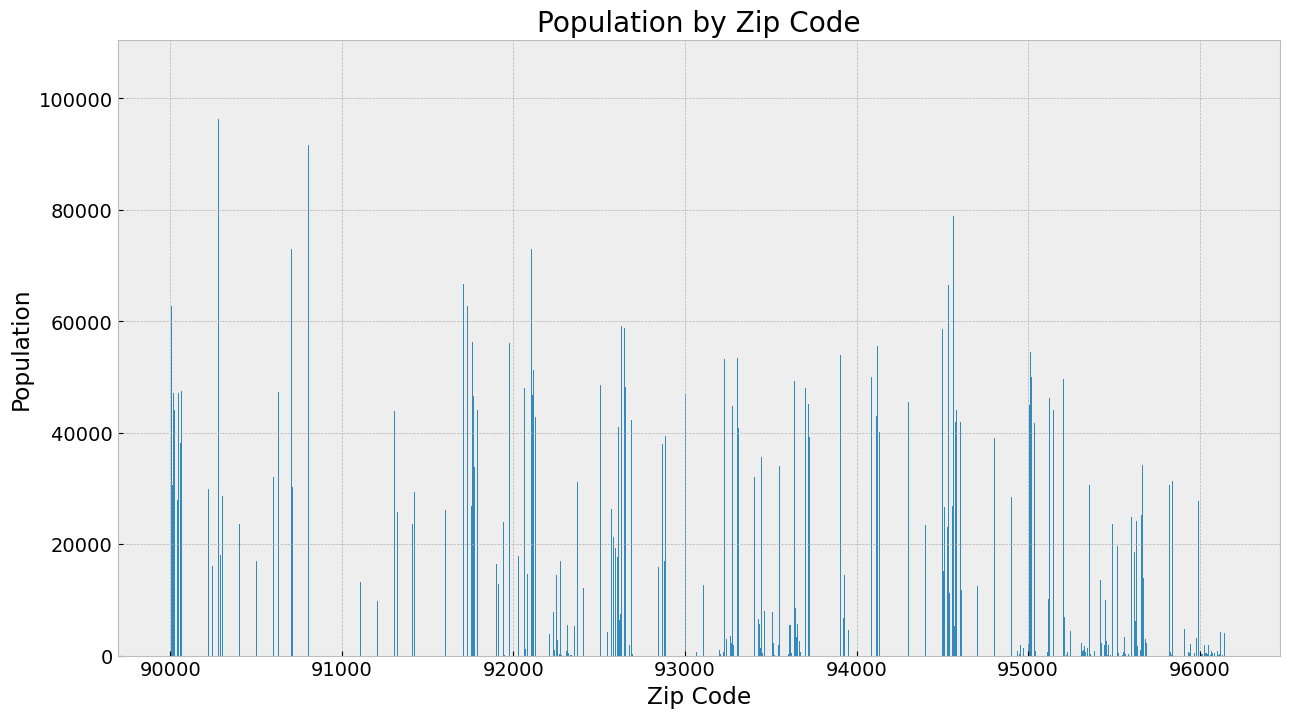

In [6]:
plt.figure(figsize=(15, 8))
x = zip_pop['Zip Code']
y = zip_pop['Population']
plt.bar(x, y)
plt.xlabel('Zip Code')
plt.ylabel('Population')
plt.title('Population by Zip Code')

### Customer Churn

In [7]:
df = pd.read_csv('data/telecom_customer_churn.csv')
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [9]:
for f in df.columns:
    if df[f].dtype == 'float64' or df[f].dtype == 'int64':
        # fill 0 for missing values
        df[f] = df[f].fillna(0)
    if df[f].dtype == 'object':
        # fill 'Missing' for missing values
        df[f] = df[f].fillna('Missing')

In [10]:
df['Multiple Lines'].value_counts()

Multiple Lines
No         3390
Yes        2971
Missing     682
Name: count, dtype: int64

In [11]:
df['City'].nunique(), df['Zip Code'].nunique()

(1106, 1626)

In [12]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [13]:
fs_needed = ['Gender', 'Age', 'Married', 'Number of Dependents', 'Zip Code', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category']

In [14]:
df = df[fs_needed]
df.shape, df.columns

((7043, 33),
 Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'Zip Code',
        'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
        'Avg Monthly Long Distance Charges', 'Multiple Lines',
        'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
        'Online Security', 'Online Backup', 'Device Protection Plan',
        'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
        'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
        'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
        'Total Extra Data Charges', 'Total Long Distance Charges',
        'Total Revenue', 'Customer Status', 'Churn Category'],
       dtype='object'))

In [15]:
df.to_csv('data/telecom_churn_filled.csv', index=False)
# df.info()

In [16]:
color_set = {
    'Color1': '#e57373',  # 柔和紅色
    'Color2': '#64b5f6',  # 柔和藍色
    'Color3': '#81c784',  # 柔和綠色
    'Color4': '#ffb74d',  # 柔和橙色
    'Color5': '#ba68c8',  # 柔和紫色
    'Color6': '#a1887f',  # 淡棕色
    'Color7': '#90a4ae',  # 淡灰藍
    'Color8': '#4db6ac',  # 柔和青色
    'Color9': '#f06292',  # 柔和粉紅色
    'Color10': '#7986cb'  # 柔和淡藍
}


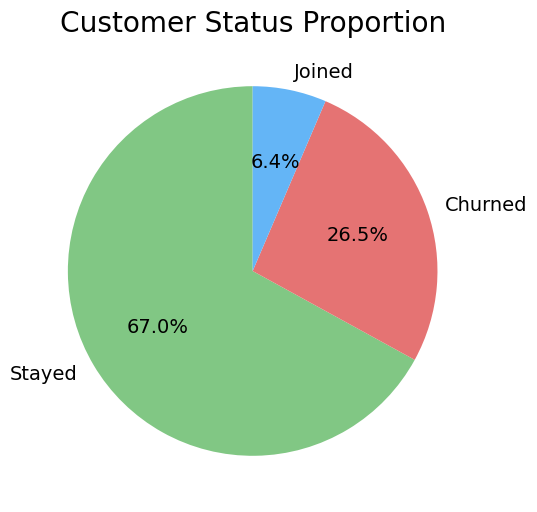

In [17]:
status_count = df['Customer Status'].value_counts()
colors = [color_set['Color3'], color_set['Color1'], color_set['Color2']]

plt.figure(figsize=(6, 6))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Customer Status Proportion')
plt.show()

In [18]:
num_fs = []
for f in df.columns:
    if df[f].dtype != 'object':
        num_fs.append(f)
len(num_fs), num_fs

(13,
 ['Age',
  'Number of Dependents',
  'Zip Code',
  'Number of Referrals',
  'Tenure in Months',
  'Avg Monthly Long Distance Charges',
  'Avg Monthly GB Download',
  'Monthly Charge',
  'Total Charges',
  'Total Refunds',
  'Total Extra Data Charges',
  'Total Long Distance Charges',
  'Total Revenue'])

In [19]:
obj_fs = [f for f in df.columns if f not in num_fs]
len(obj_fs), obj_fs

(20,
 ['Gender',
  'Married',
  'Offer',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Internet Type',
  'Online Security',
  'Online Backup',
  'Device Protection Plan',
  'Premium Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Streaming Music',
  'Unlimited Data',
  'Contract',
  'Paperless Billing',
  'Payment Method',
  'Customer Status',
  'Churn Category'])

In [20]:
removed_fs = ['City', 'Churn Category', 'Customer Status']
eda_obj_fs = [f for f in obj_fs if f not in removed_fs]
len(eda_obj_fs)

18

### Categorical Features

#### feature vs Status

/var/folders/8c/4kf2dbns55n20sd1g9w_v8rc0000gp/T/ipykernel_10810/911690825.py:27: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  fig.legend(bars, labels=status_distribution.columns, title='Customer Status', loc='center left', bbox_to_anchor=(1.01, 0.5))


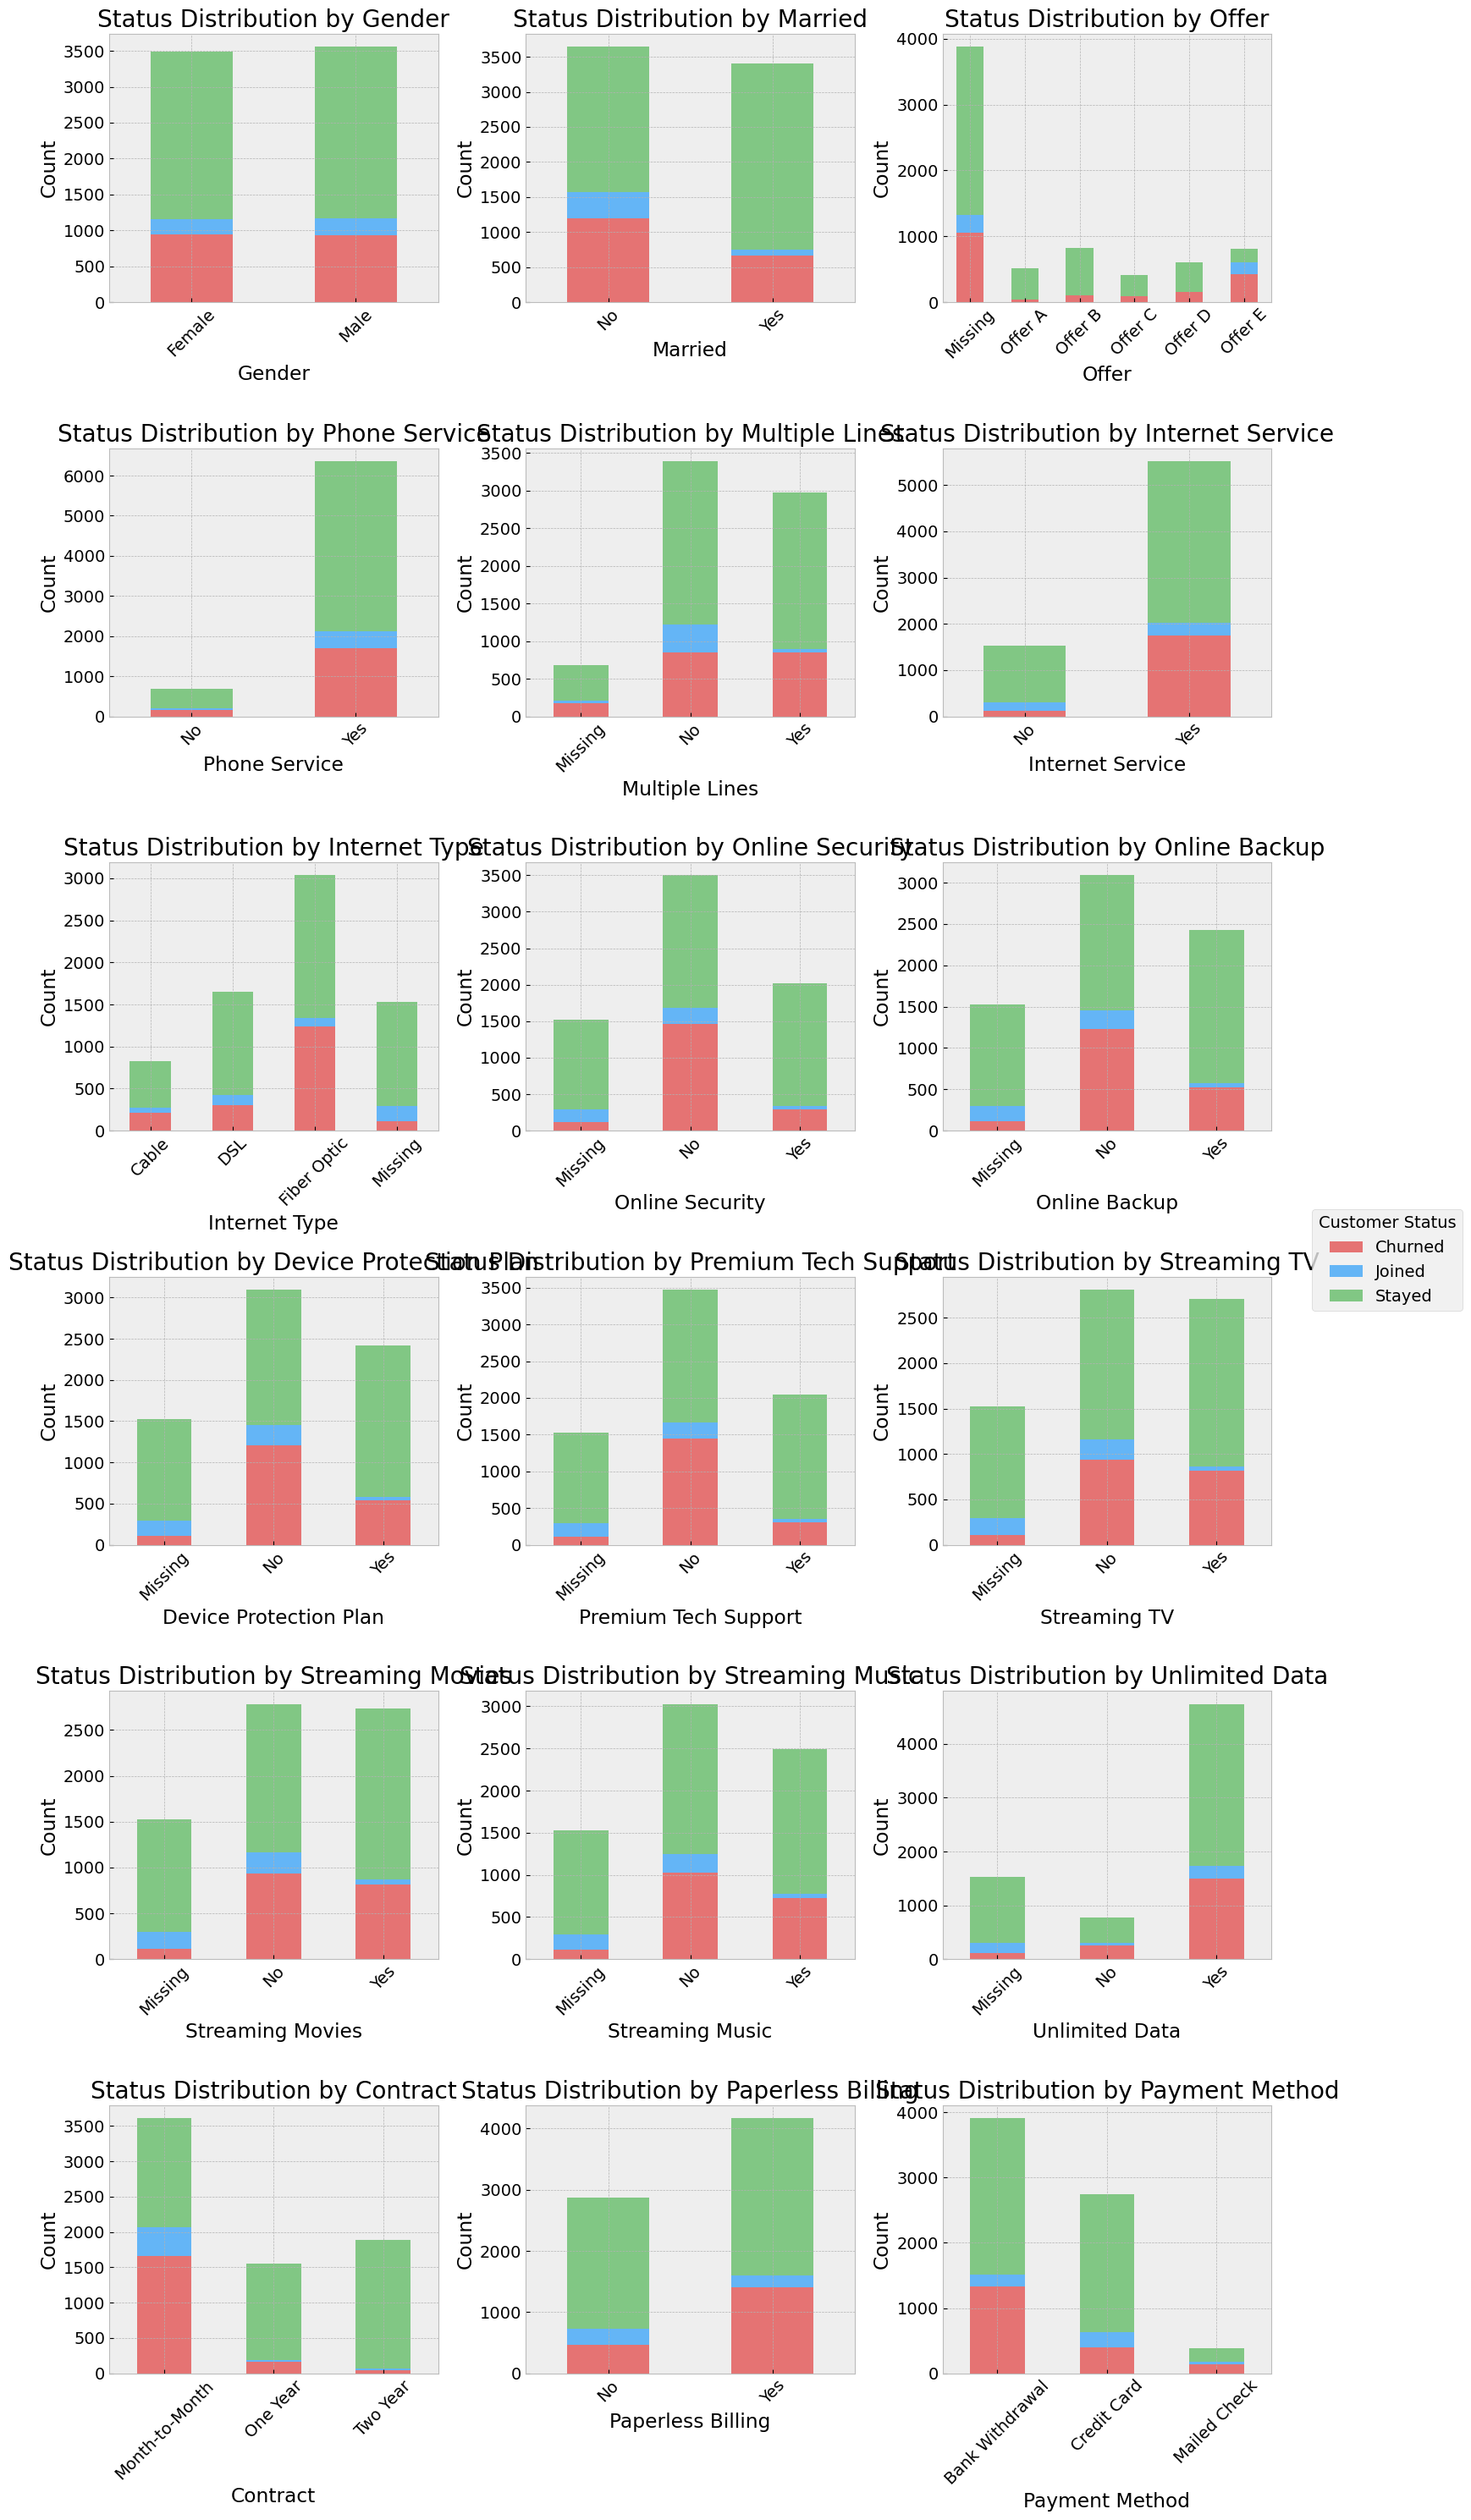

In [21]:
n_cols = 3
n_rows = (len(eda_obj_fs) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(eda_obj_fs):
    status_distribution = df.groupby([feature, 'Customer Status'])['Customer Status'].count().unstack()
    colors = [color_set[f'Color{i+1}'] for i in range(len(status_distribution.columns))]
    bars = status_distribution.plot(kind='bar', stacked=True, color=colors, ax=axes[i])
    axes[i].set_title(f'Status Distribution by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', labelrotation=45)

    # remove legend from each subplot to avoid duplication
    axes[i].legend().set_visible(False)

# add a single global legend using handles from the last plot
if bars:
    fig.legend(bars, labels=status_distribution.columns, title='Customer Status', loc='center left', bbox_to_anchor=(1.01, 0.5))

# turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [22]:
# calculate the number of yes compared to no
phone_service_count = df['Phone Service'].value_counts()
print(phone_service_count)
print(phone_service_count['Yes'] / phone_service_count['No'])

Phone Service
Yes    6361
No      682
Name: count, dtype: int64
9.326979472140762


In [23]:
internet_service_count = df['Internet Service'].value_counts()
print(internet_service_count)
print(internet_service_count['Yes'] / internet_service_count['No'])

Internet Service
Yes    5517
No     1526
Name: count, dtype: int64
3.6153342070773262


In [24]:
unlimited_data_count = df['Unlimited Data'].value_counts()
print(unlimited_data_count)
print(unlimited_data_count['Yes'] / unlimited_data_count['No'])

Unlimited Data
Yes        4745
Missing    1526
No          772
Name: count, dtype: int64
6.146373056994818


In [25]:
# calculate how many times the percentage of churned customers use offer E compared to offer A
offer_counts = df.groupby(['Offer', 'Customer Status'])['Customer Status'].count().unstack()
offer_counts


Customer Status  Churned  Joined  Stayed
Offer                                   
Missing           1051.0   279.0  2547.0
Offer A             35.0     NaN   485.0
Offer B            101.0     NaN   723.0
Offer C             95.0     NaN   320.0
Offer D            161.0     NaN   441.0
Offer E            426.0   175.0   204.0

#### churn proportion

In [26]:
per_a = offer_counts.loc['Offer A', 'Churned'] / offer_counts.loc['Offer A'].sum()
per_b = offer_counts.loc['Offer B', 'Churned'] / offer_counts.loc['Offer B'].sum()
per_c = offer_counts.loc['Offer C', 'Churned'] / offer_counts.loc['Offer C'].sum()
per_d = offer_counts.loc['Offer D', 'Churned'] / offer_counts.loc['Offer D'].sum()
per_e = offer_counts.loc['Offer E', 'Churned'] / offer_counts.loc['Offer E'].sum()

print(per_a, per_b, per_c, per_d, per_e)
per_e / per_a

0.0673076923076923 0.12257281553398058 0.2289156626506024 0.26744186046511625 0.529192546583851


np.float64(7.8622892635315)

In [27]:
internet_churn_prop = df.groupby(['Internet Service', 'Customer Status'])['Customer Status'].count().unstack()
internet_churn_prop

Customer Status   Churned  Joined  Stayed
Internet Service                         
No                    113     182    1231
Yes                  1756     272    3489

In [28]:
per_churned_yes = internet_churn_prop.loc['Yes', 'Churned'] / internet_churn_prop.loc['Yes'].sum()
per_churned_no = internet_churn_prop.loc['No', 'Churned'] / internet_churn_prop.loc['No'].sum()
print(per_churned_yes, per_churned_no)
print(per_churned_yes / per_churned_no)

0.3182889251404749 0.07404980340760157
4.298308847472254


In [29]:
security_churn_prop = df.groupby(['Online Security', 'Customer Status'])['Customer Status'].count().unstack()
security_churn_prop

Customer Status  Churned  Joined  Stayed
Online Security                         
Missing              113     182    1231
No                  1461     226    1811
Yes                  295      46    1678

In [30]:
security_yes_prop = security_churn_prop.loc['Yes', 'Churned'] / security_churn_prop.loc['Yes'].sum()
security_no_prop = security_churn_prop.loc['No', 'Churned'] / security_churn_prop.loc['No'].sum()
print(security_yes_prop, security_no_prop)
print(security_no_prop / security_yes_prop)

0.14611193660227836 0.4176672384219554
2.8585428961828065


In [31]:
tech_churn_prop = df.groupby(['Premium Tech Support', 'Customer Status'])['Customer Status'].count().unstack()
tech_churn_prop

Customer Status       Churned  Joined  Stayed
Premium Tech Support                         
Missing                   113     182    1231
No                       1446     225    1802
Yes                       310      47    1687

In [32]:
tech_yes_prop = tech_churn_prop.loc['Yes', 'Churned'] / tech_churn_prop.loc['Yes'].sum()
tech_no_prop = tech_churn_prop.loc['No', 'Churned'] / tech_churn_prop.loc['No'].sum()
print(tech_yes_prop, tech_no_prop)
print(tech_no_prop / tech_yes_prop)

0.15166340508806261 0.4163547365390153
2.7452551015669266


In [33]:
contract_churn_prop = df.groupby(['Contract', 'Customer Status'])['Customer Status'].count().unstack()
contract_churn_prop

Customer Status  Churned  Joined  Stayed
Contract                                
Month-to-Month      1655     408    1547
One Year             166      24    1360
Two Year              48      22    1813

In [34]:
contract_month_prop = contract_churn_prop.loc['Month-to-Month', 'Churned'] / contract_churn_prop.loc['Month-to-Month'].sum()
contract_year_prop = contract_churn_prop.loc['Two Year', 'Churned'] / contract_churn_prop.loc['Two Year'].sum()
print(contract_year_prop, contract_month_prop)print(contract_month_prop / contract_year_prop)

0.025491237387148168 0.4584487534626039
17.984562557710063


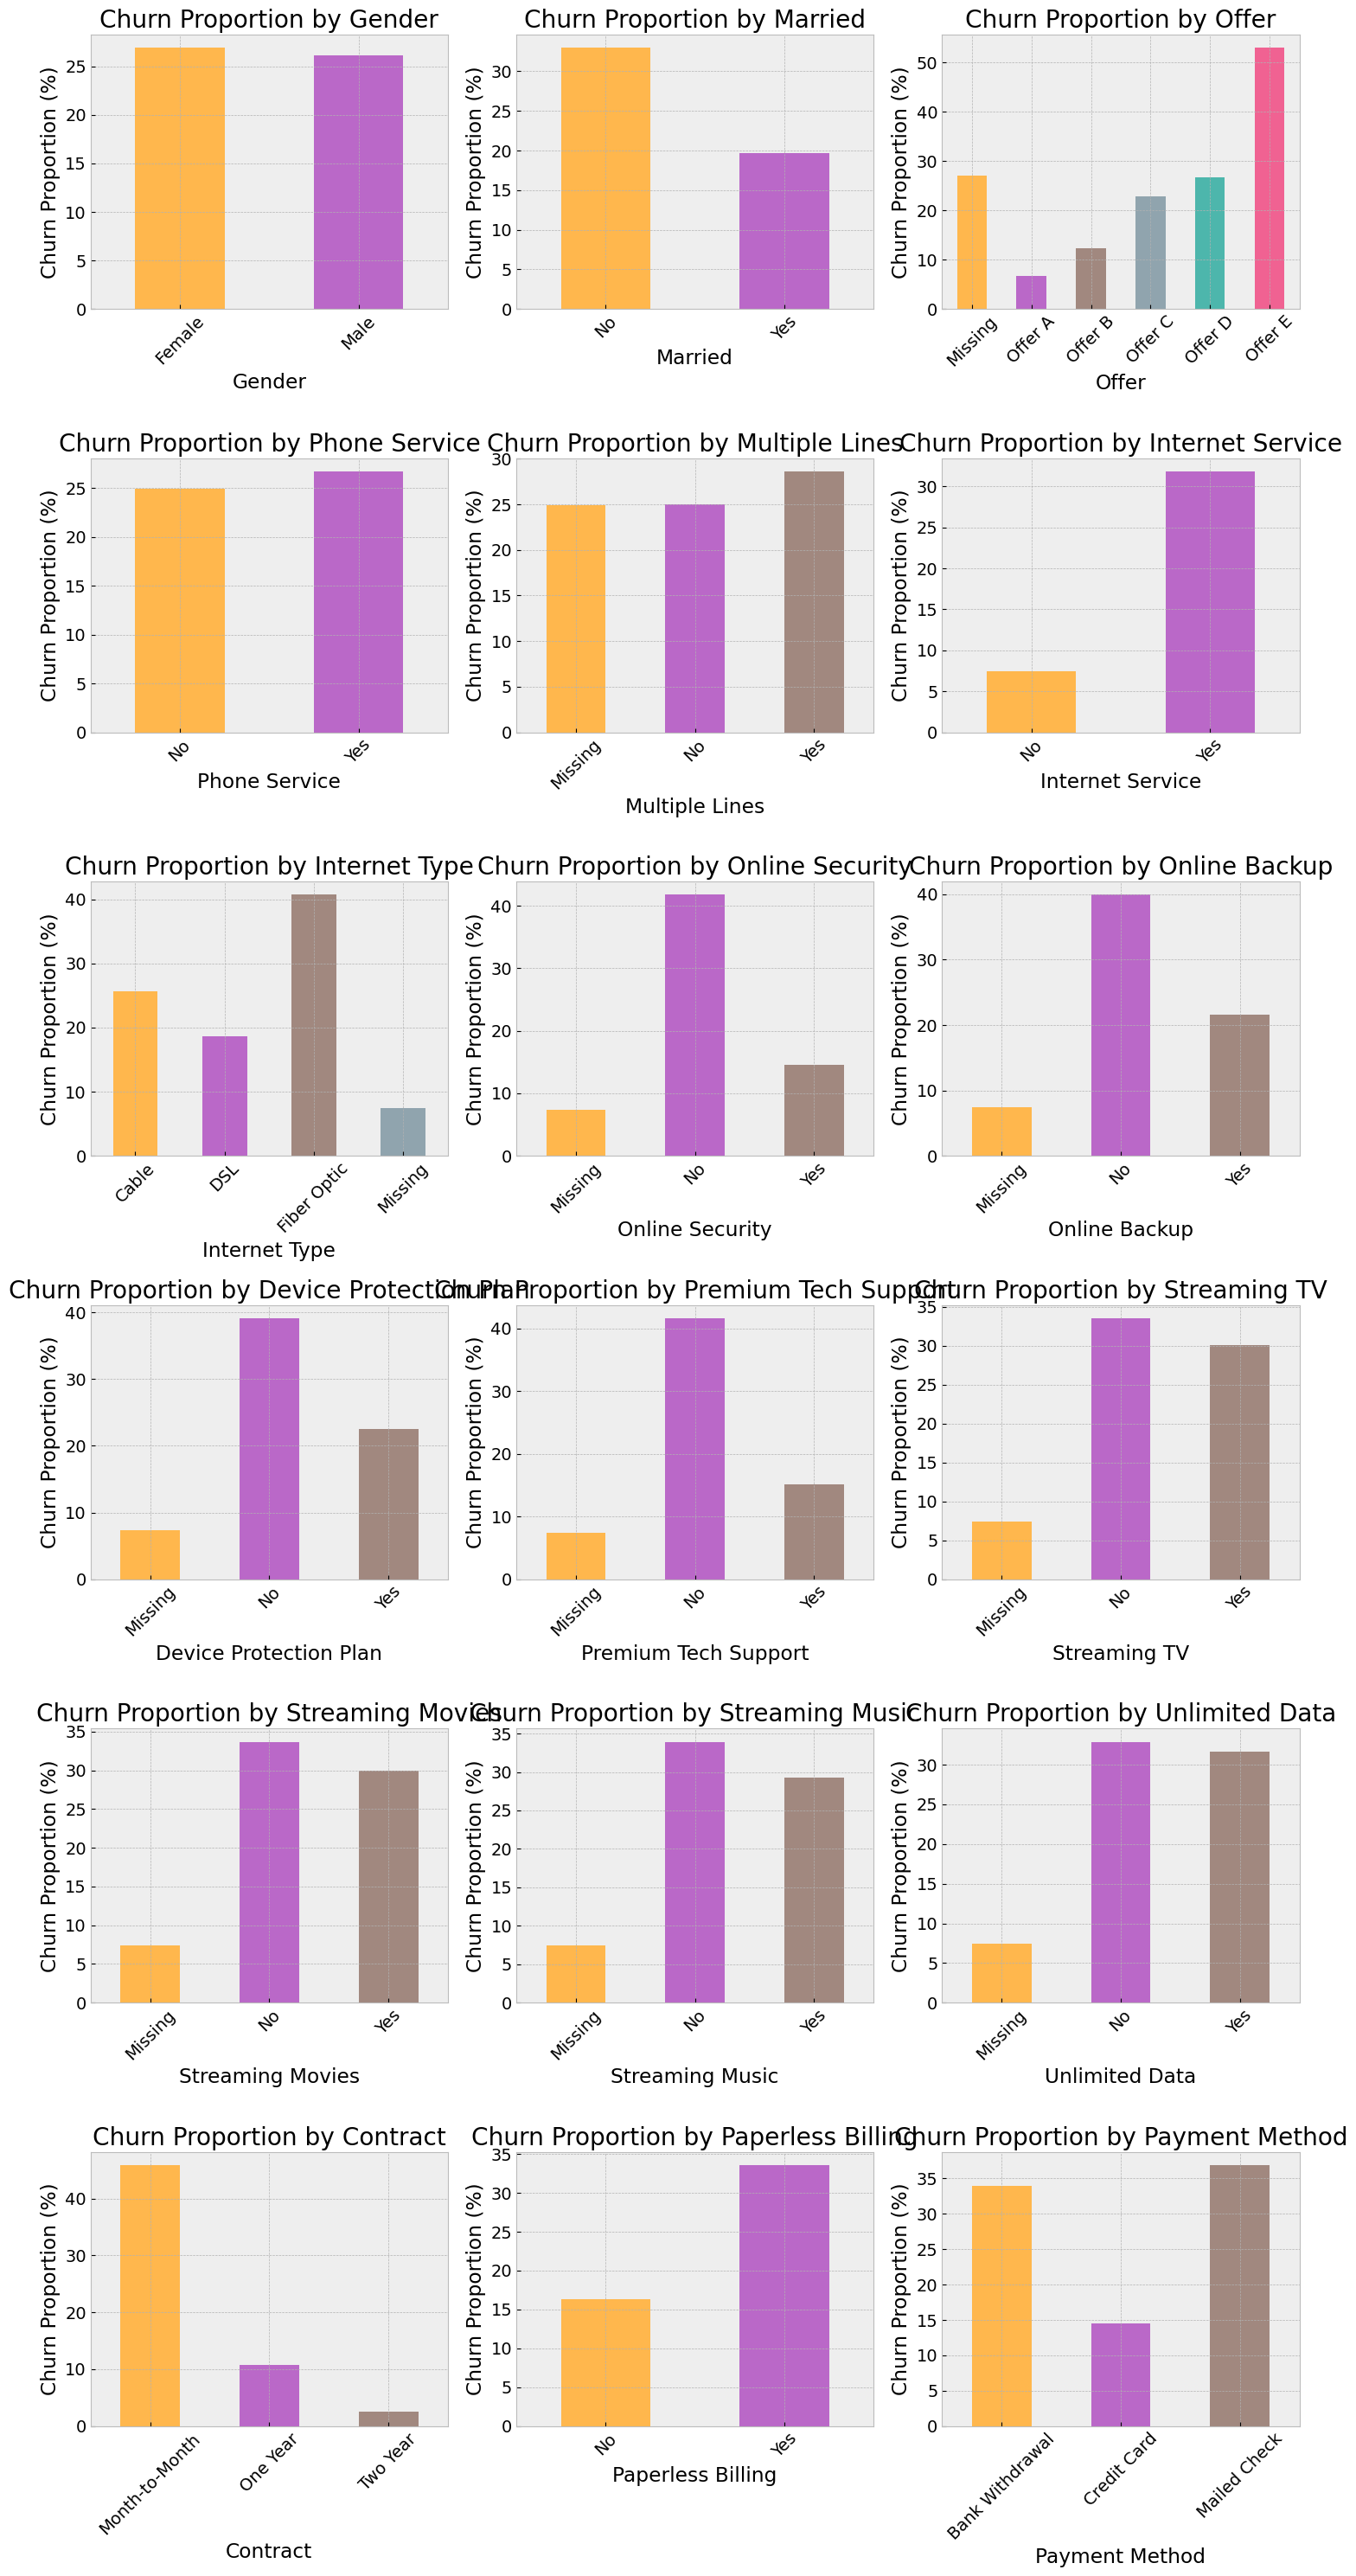

In [35]:
n_cols = 3
n_rows = (len(eda_obj_fs) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(eda_obj_fs):
    status_distribution = df.groupby([feature, 'Customer Status'])['Customer Status'].count().unstack()
    churn_proportion = (status_distribution['Churned'] / status_distribution.sum(axis=1)) * 100

    categories = churn_proportion.index
    colors = [color_set[f'Color{i + 4}'] for i in range(len(categories))]

    churn_proportion.plot(kind='bar', color=colors, ax=axes[i])
    axes[i].set_title(f'Churn Proportion by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Churn Proportion (%)')
    axes[i].tick_params(axis='x', labelrotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [36]:
df.head()

Gender  Age Married  Number of Dependents  Zip Code  Number of Referrals  \
0  Female   37     Yes                     0     93225                    2   
1    Male   46      No                     0     91206                    0   
2    Male   50      No                     0     92627                    0   
3    Male   78     Yes                     0     94553                    1   
4  Female   75     Yes                     0     93010                    3   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
0                 9  Missing           Yes                              42.39   
1                 9  Missing           Yes                              10.69   
2                 4  Offer E           Yes                              33.65   
3                13  Offer D           Yes                              27.82   
4                 3  Missing           Yes                               7.38   

   ... Paperless Billing   Payment Method Monthly Charge  Total Charges  \
0  ...               Yes      Credit Card           65.6         593.30   
1  ...                No      Credit Card           -4.0         542.40   
2  ...               Yes  Bank Withdrawal           73.9         280.85   
3  ...               Yes  Bank Withdrawal           98.0        1237.85   
4  ...               Yes      Credit Card           83.9         267.40   

  Total Refunds Total Extra Data Charges Total Long Distance Charges  \
0          0.00                        0                      381.51   
1         38.33                       10                       96.21   
2          0.00                        0                      134.60   
3          0.00                        0                      361.66   
4          0.00                        0                       22.14   

  Total Revenue Customer Status   Churn Category  
0        974.81          Stayed          Missing  
1        610.28          Stayed          Missing  
2        415.45         Churned       Competitor  
3       1599.51         Churned  Dissatisfaction  
4        289.54         Churned  Dissatisfaction  

[5 rows x 33 columns]

label encoding

In [37]:
def encode_categorical(df, fs):
    for f in fs:
        if df[f].dtype == 'object':
            le = LabelEncoder()
            df[f] = le.fit_transform(df[f])
    return df


0: churned, 1: joined, 2: stayed

In [38]:
data = encode_categorical(df.copy(), obj_fs)
data.head()

Gender  Age  Married  Number of Dependents  Zip Code  Number of Referrals  \
0       0   37        1                     0     93225                    2   
1       1   46        0                     0     91206                    0   
2       1   50        0                     0     92627                    0   
3       1   78        1                     0     94553                    1   
4       0   75        1                     0     93010                    3   

   Tenure in Months  Offer  Phone Service  Avg Monthly Long Distance Charges  \
0                 9      0              1                              42.39   
1                 9      0              1                              10.69   
2                 4      5              1                              33.65   
3                13      4              1                              27.82   
4                 3      0              1                               7.38   

   ...  Paperless Billing  Payment Method  Monthly Charge  Total Charges  \
0  ...                  1               1            65.6         593.30   
1  ...                  0               1            -4.0         542.40   
2  ...                  1               0            73.9         280.85   
3  ...                  1               0            98.0        1237.85   
4  ...                  1               1            83.9         267.40   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   Total Revenue  Customer Status  Churn Category  
0         974.81                2               3  
1         610.28                2               3  
2         415.45                0               1  
3        1599.51                0               2  
4         289.54                0               2  

[5 rows x 33 columns]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   int64  
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   int64  
 3   Number of Dependents               7043 non-null   int64  
 4   Zip Code                           7043 non-null   int64  
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Offer                              7043 non-null   int64  
 8   Phone Service                      7043 non-null   int64  
 9   Avg Monthly Long Distance Charges  7043 non-null   float64
 10  Multiple Lines                     7043 non-null   int64  
 11  Internet Service                   7043 non-null   int64

In [40]:
data.to_csv('data/telecom_churn_encoded.csv', index=False)

In [41]:
data = pd.read_csv('data/telecom_churn_encoded.csv')
data.head()

Gender  Age  Married  Number of Dependents  Zip Code  Number of Referrals  \
0       0   37        1                     0     93225                    2   
1       1   46        0                     0     91206                    0   
2       1   50        0                     0     92627                    0   
3       1   78        1                     0     94553                    1   
4       0   75        1                     0     93010                    3   

   Tenure in Months  Offer  Phone Service  Avg Monthly Long Distance Charges  \
0                 9      0              1                              42.39   
1                 9      0              1                              10.69   
2                 4      5              1                              33.65   
3                13      4              1                              27.82   
4                 3      0              1                               7.38   

   ...  Paperless Billing  Payment Method  Monthly Charge  Total Charges  \
0  ...                  1               1            65.6         593.30   
1  ...                  0               1            -4.0         542.40   
2  ...                  1               0            73.9         280.85   
3  ...                  1               0            98.0        1237.85   
4  ...                  1               1            83.9         267.40   

   Total Refunds  Total Extra Data Charges  Total Long Distance Charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   Total Revenue  Customer Status  Churn Category  
0         974.81                2               3  
1         610.28                2               3  
2         415.45                0               1  
3        1599.51                0               2  
4         289.54                0               2  

[5 rows x 33 columns]

### Numerical Features

In [42]:
for f in num_fs:
    print(df[f].value_counts())

Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
78     63
66     63
67     61
72     58
Name: count, Length: 62, dtype: int64
Number of Dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
9       1
8       1
Name: count, dtype: int64
Zip Code
92028    43
92027    38
92122    36
92117    34
92126    32
         ..
93528     2
92105     2
96150     2
91934     2
93711     1
Name: count, Length: 1626, dtype: int64
Number of Referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64
Tenure in Months
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
Avg Monthly Long Distance Charges
0.00     682
18.26      7
30.07      6
45.92      6
30.09      6
        ... 
32.23      1
22.26      1
47.03      1
42.21      1
2.01       1


In [43]:
num_fs

['Age',
 'Number of Dependents',
 'Zip Code',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Refunds',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

In [44]:
eda_num_fs = ['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly GB Download',
 'Total Extra Data Charges',
 'Zip Code'
 ]

#### feature vs status

In [45]:
def status_distribution(df, f):
    status_dis = df.groupby([f, 'Customer Status'])['Customer Status'].count().unstack()
    colors = [color_set['Color1'], color_set['Color2'], color_set['Color3']]
    status_dis.plot(kind='bar', stacked=True, color=colors, figsize=(25, 15))
    plt.title(f'{f} vs Customer Status')
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.tick_params(axis='x', labelrotation=45)
    plt.show()

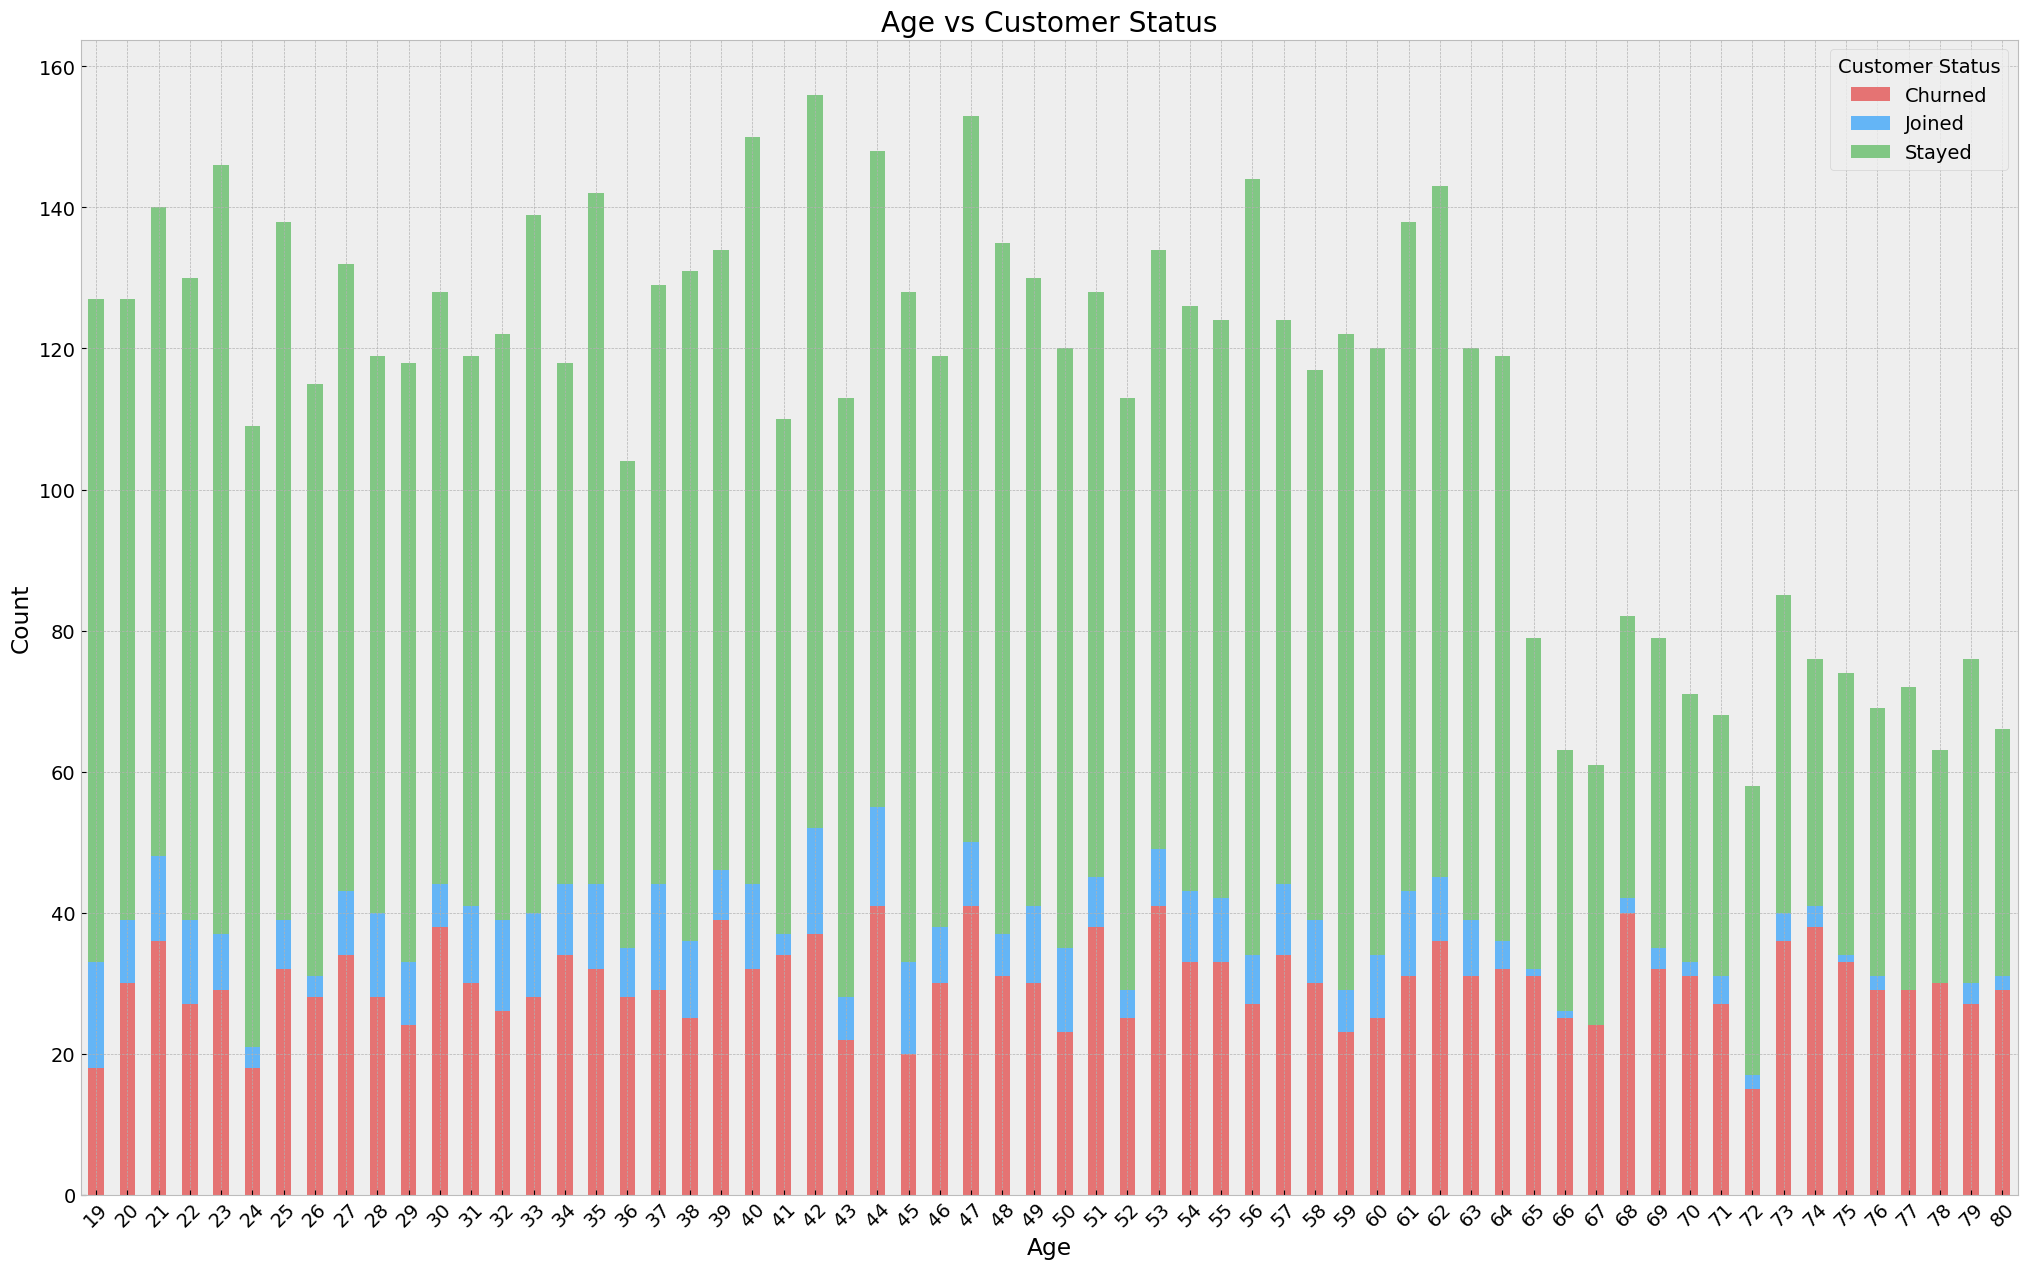

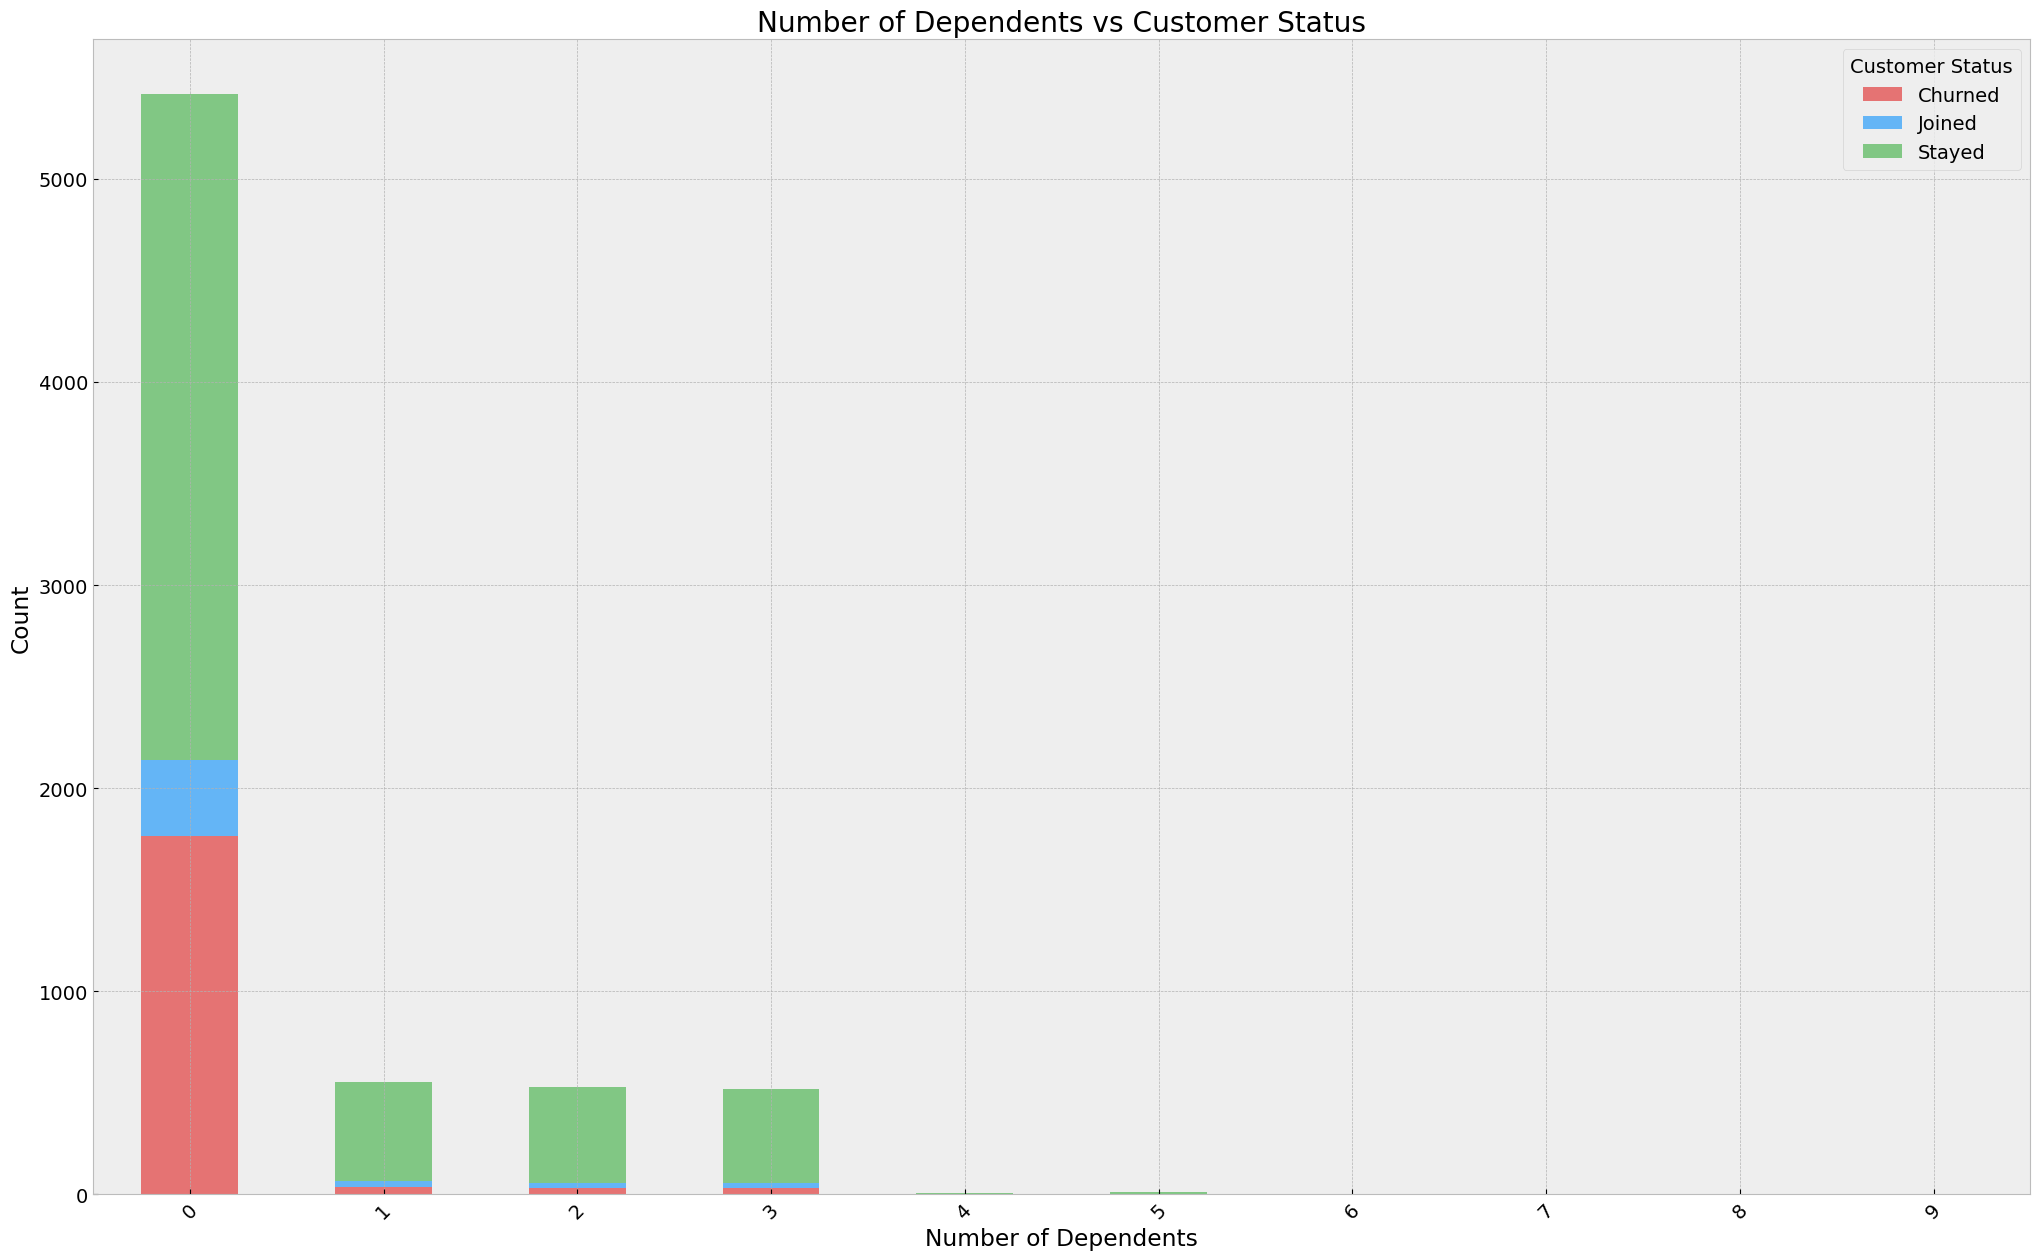

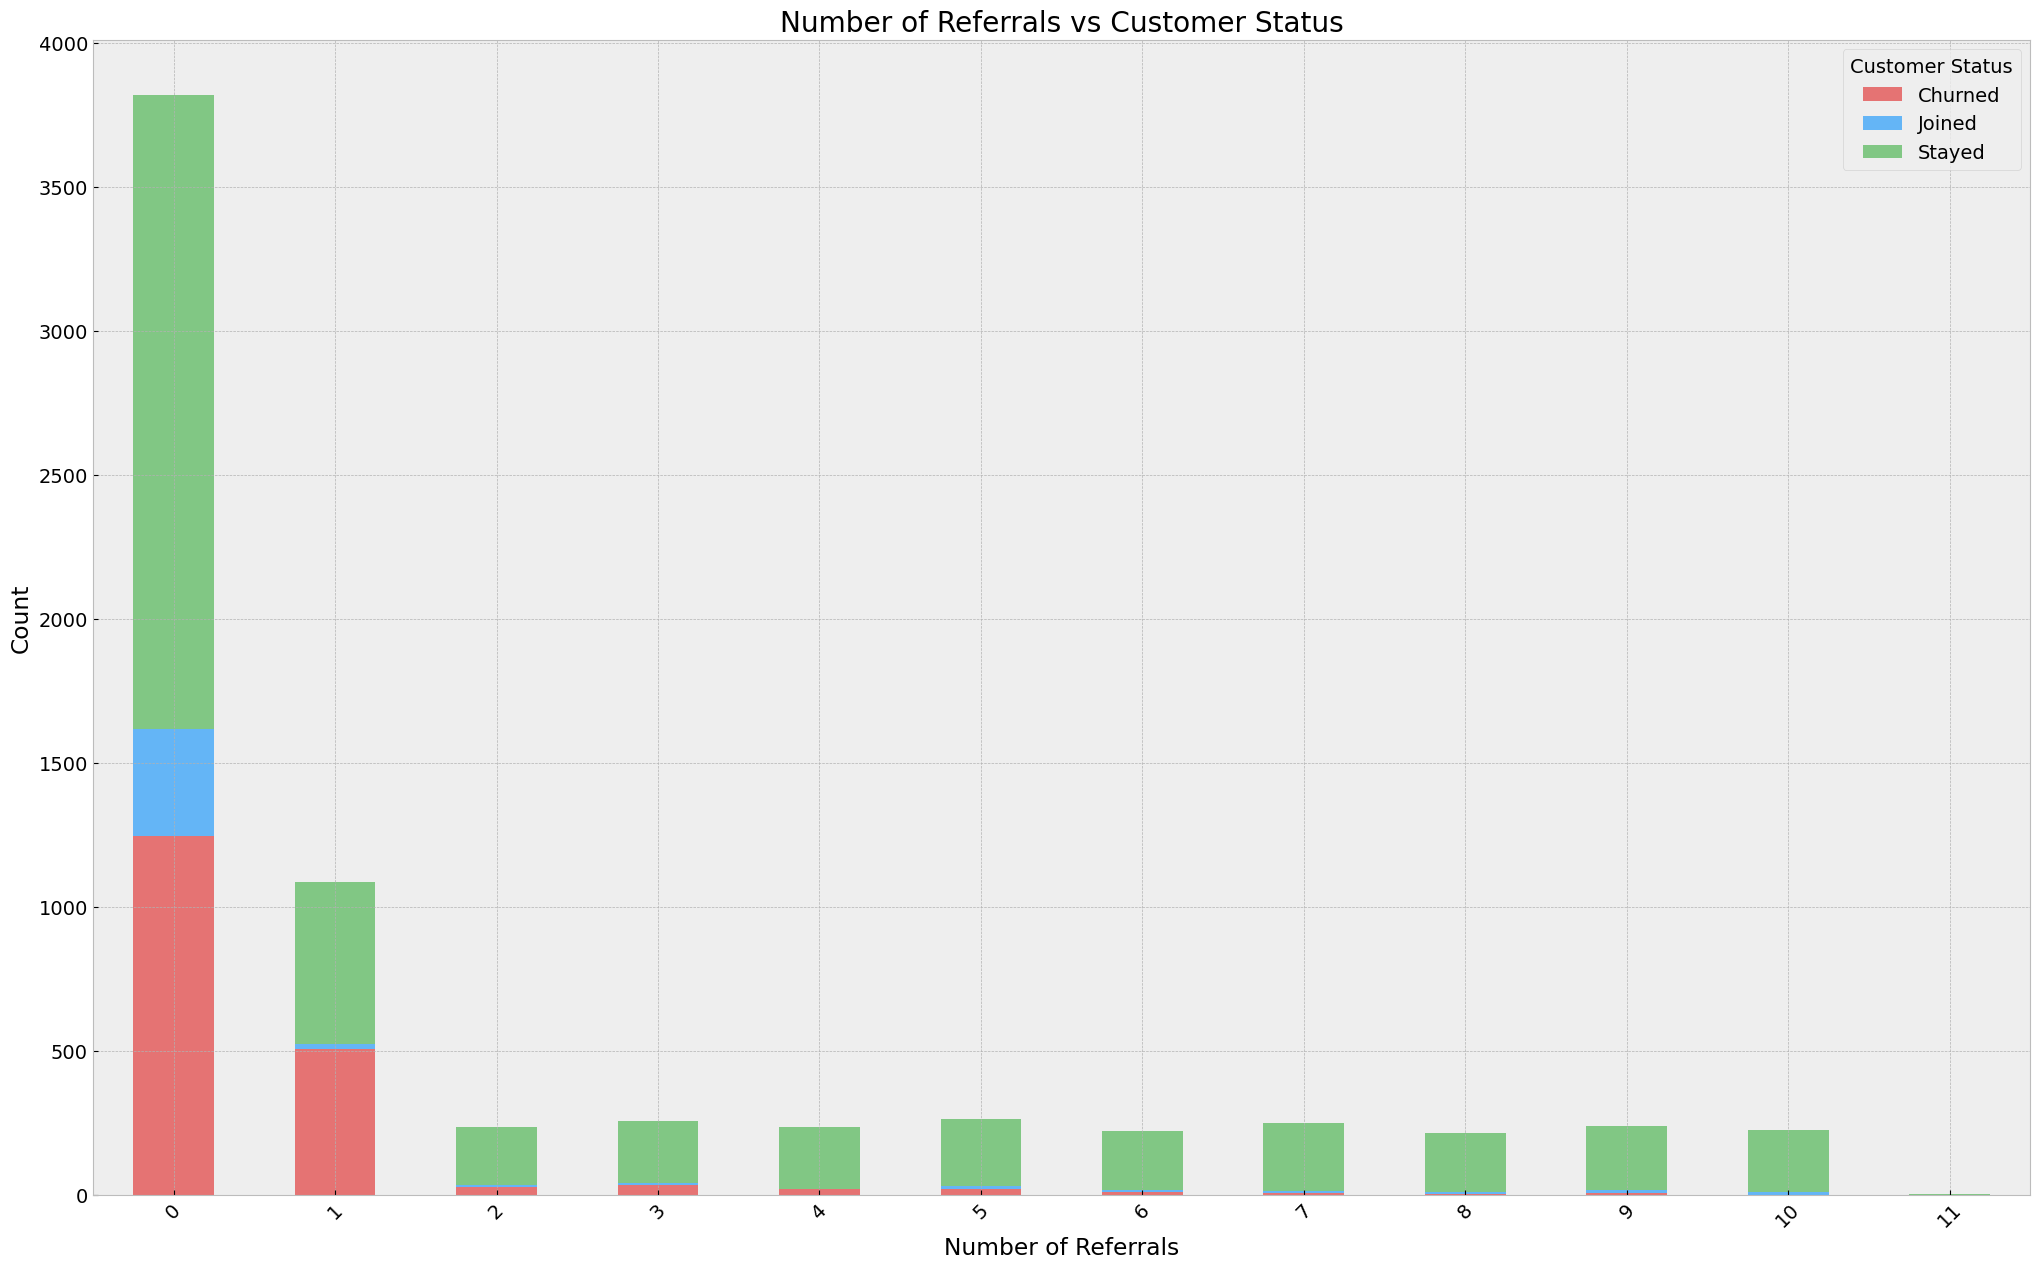

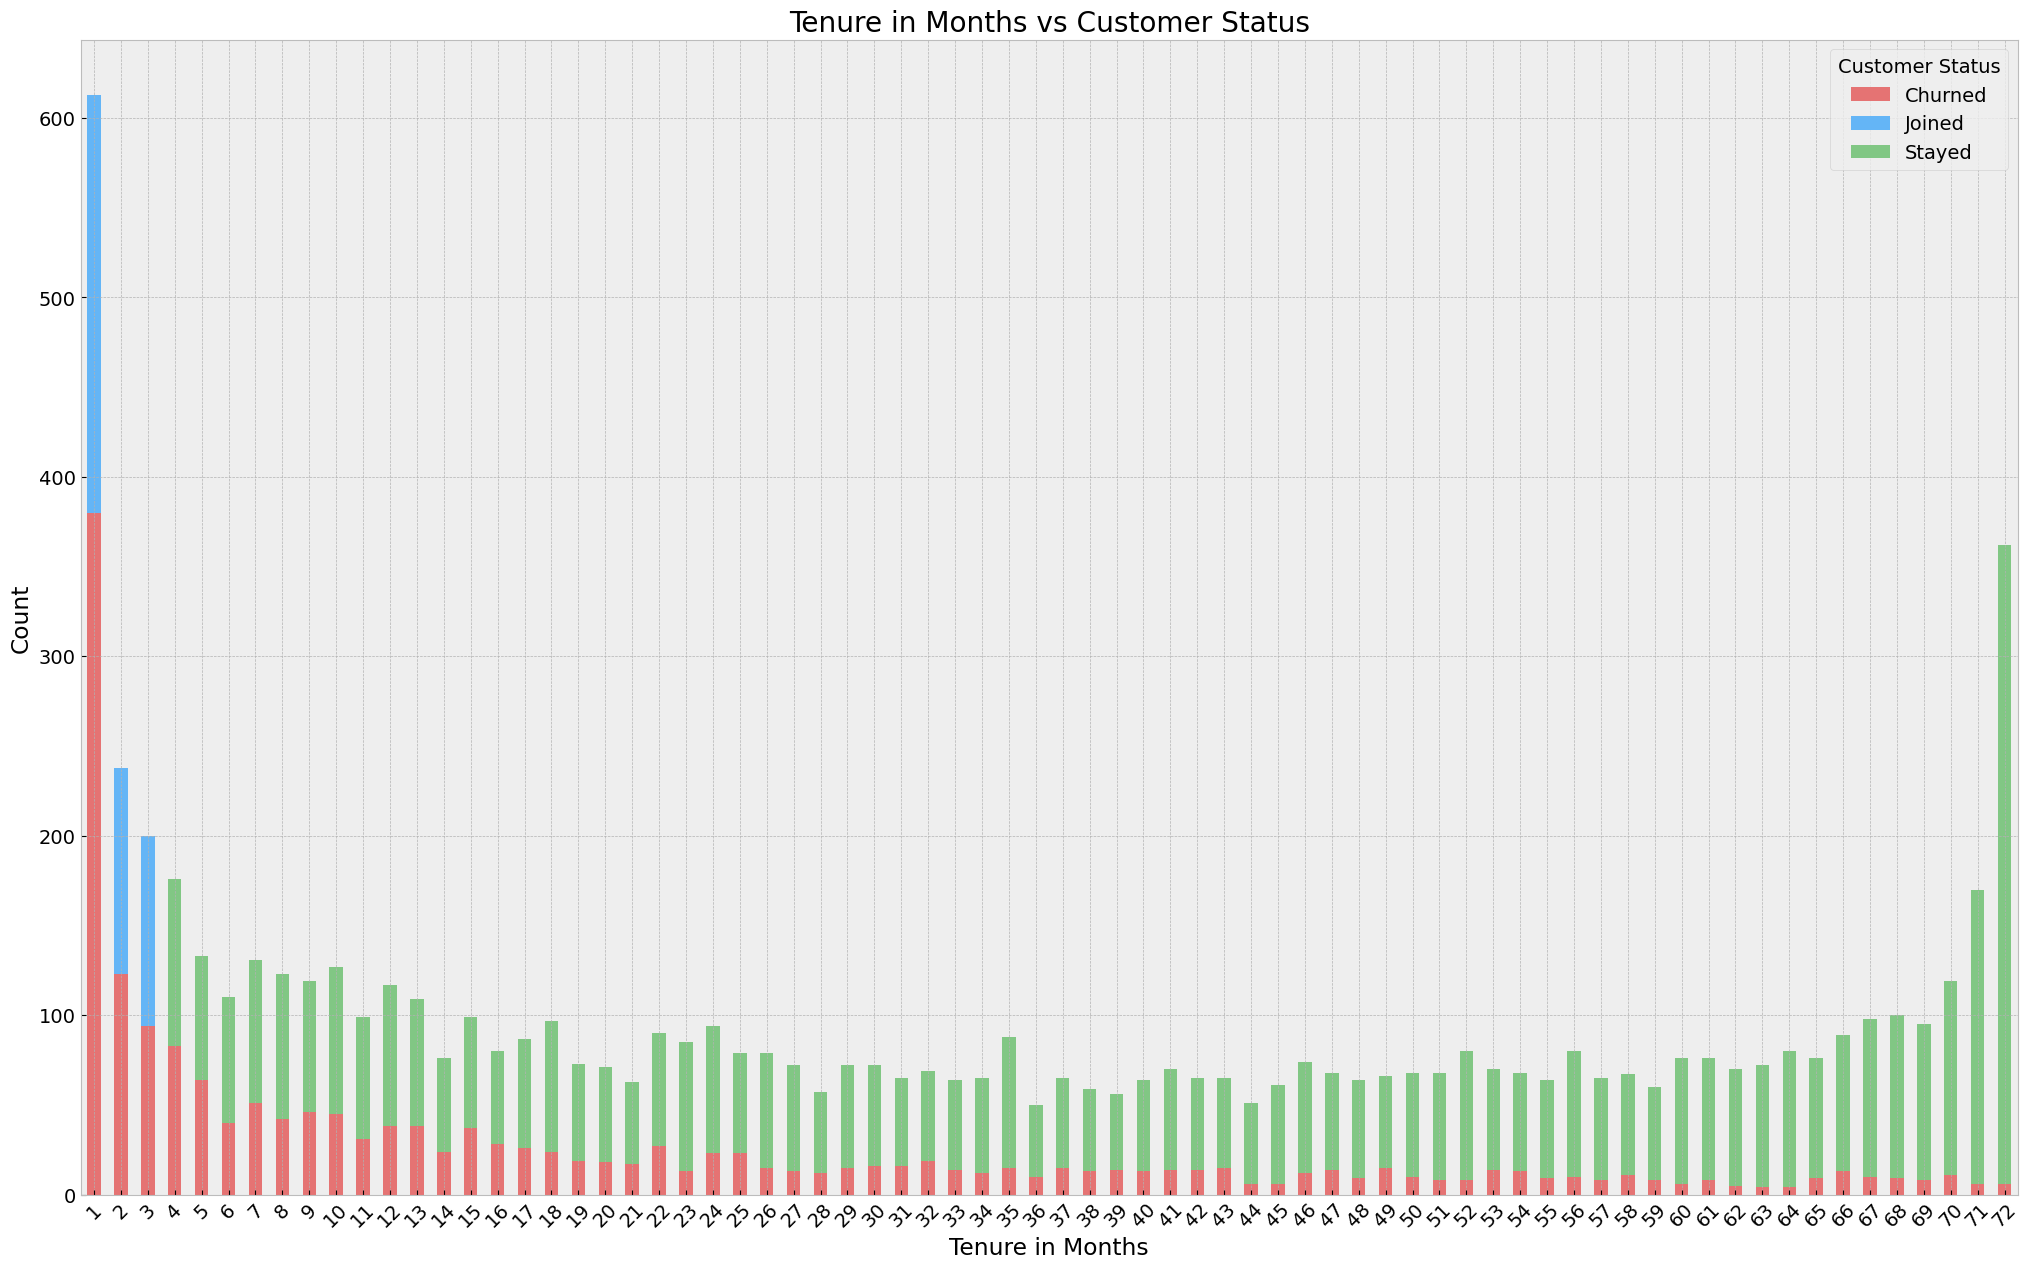

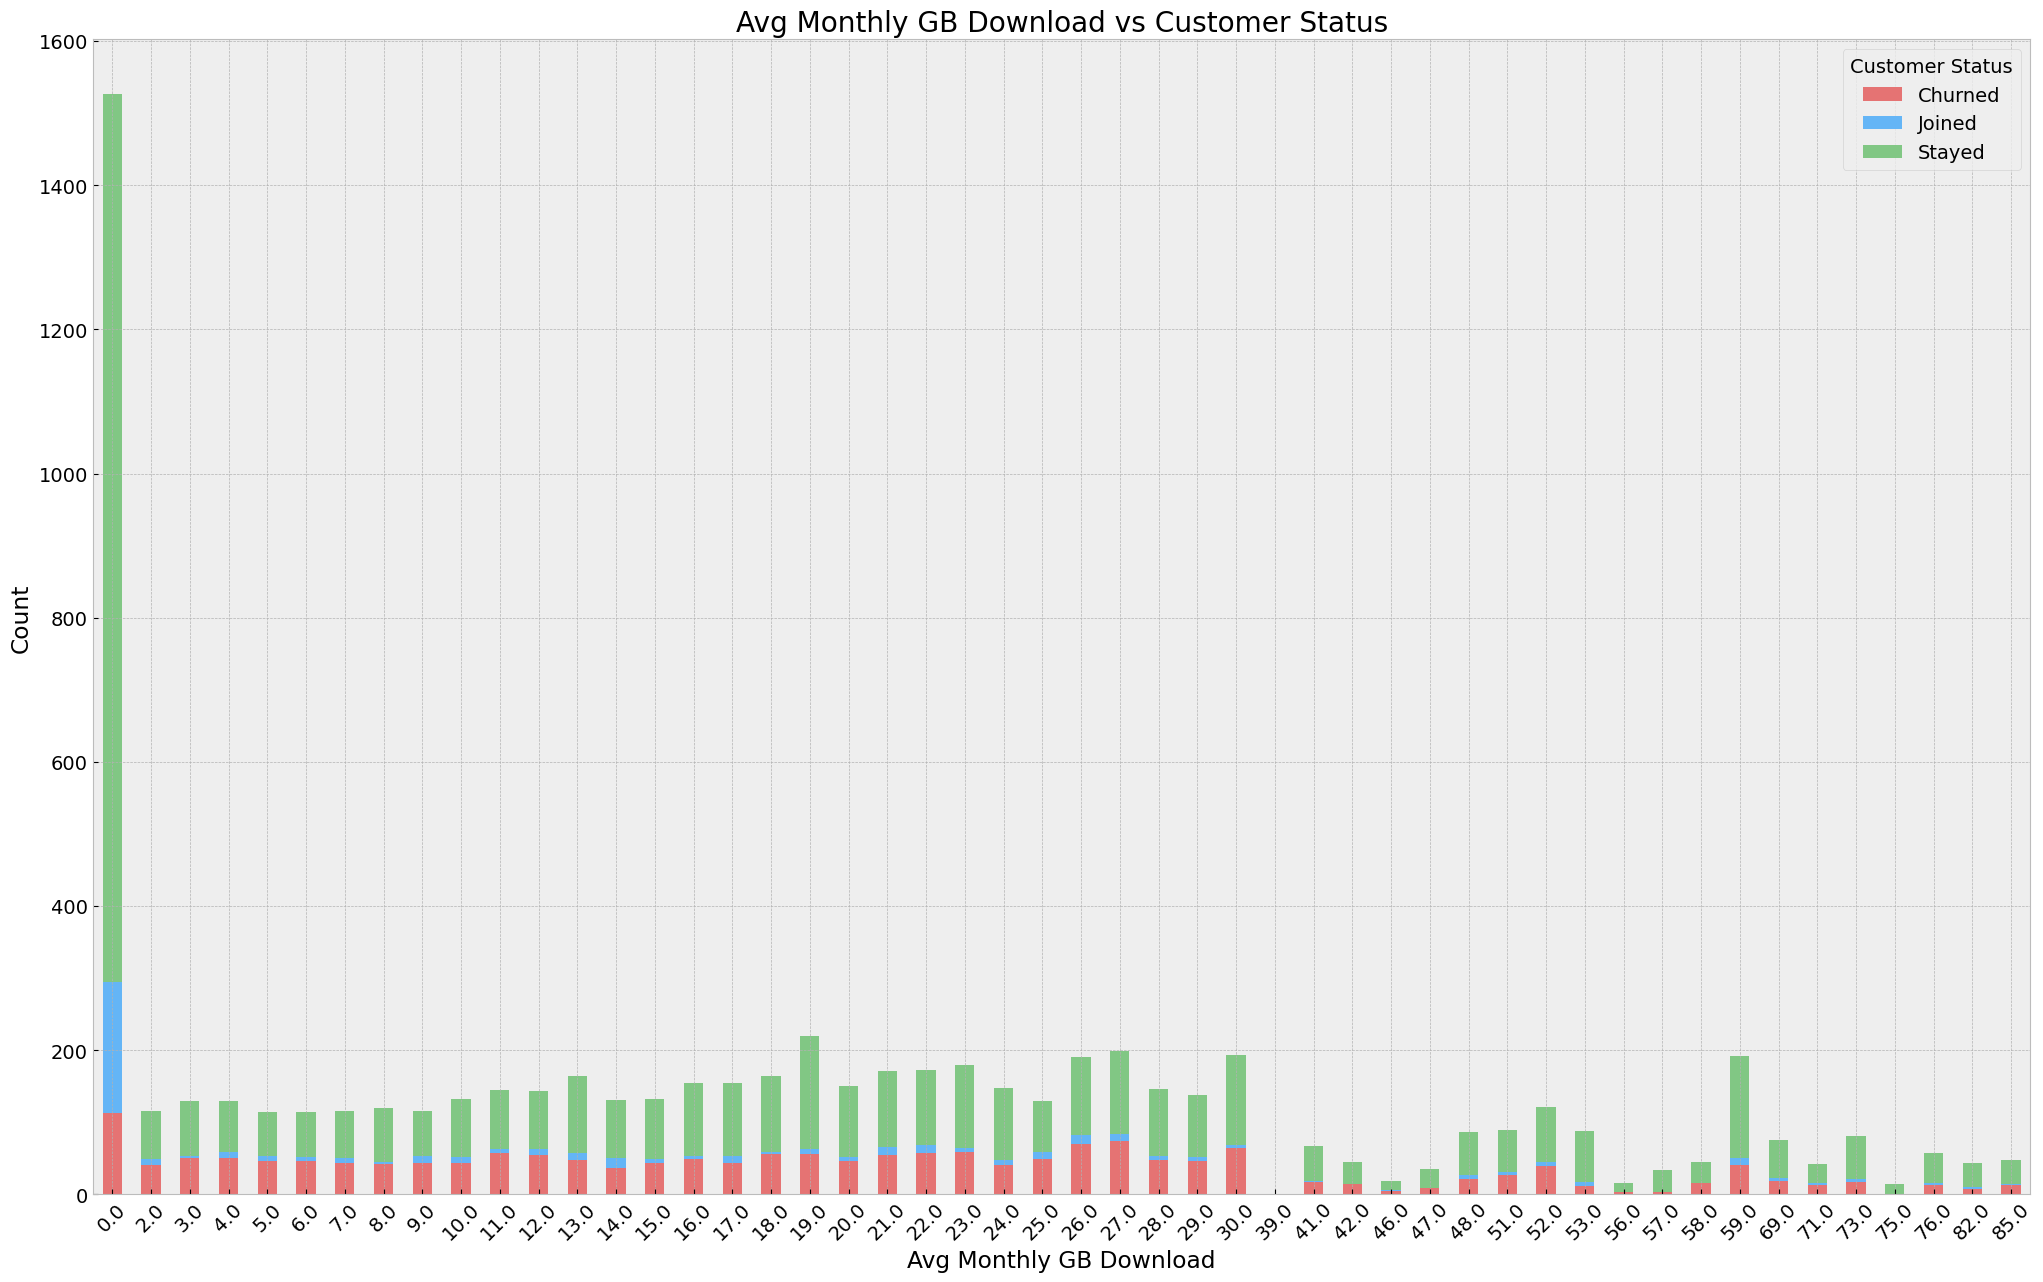

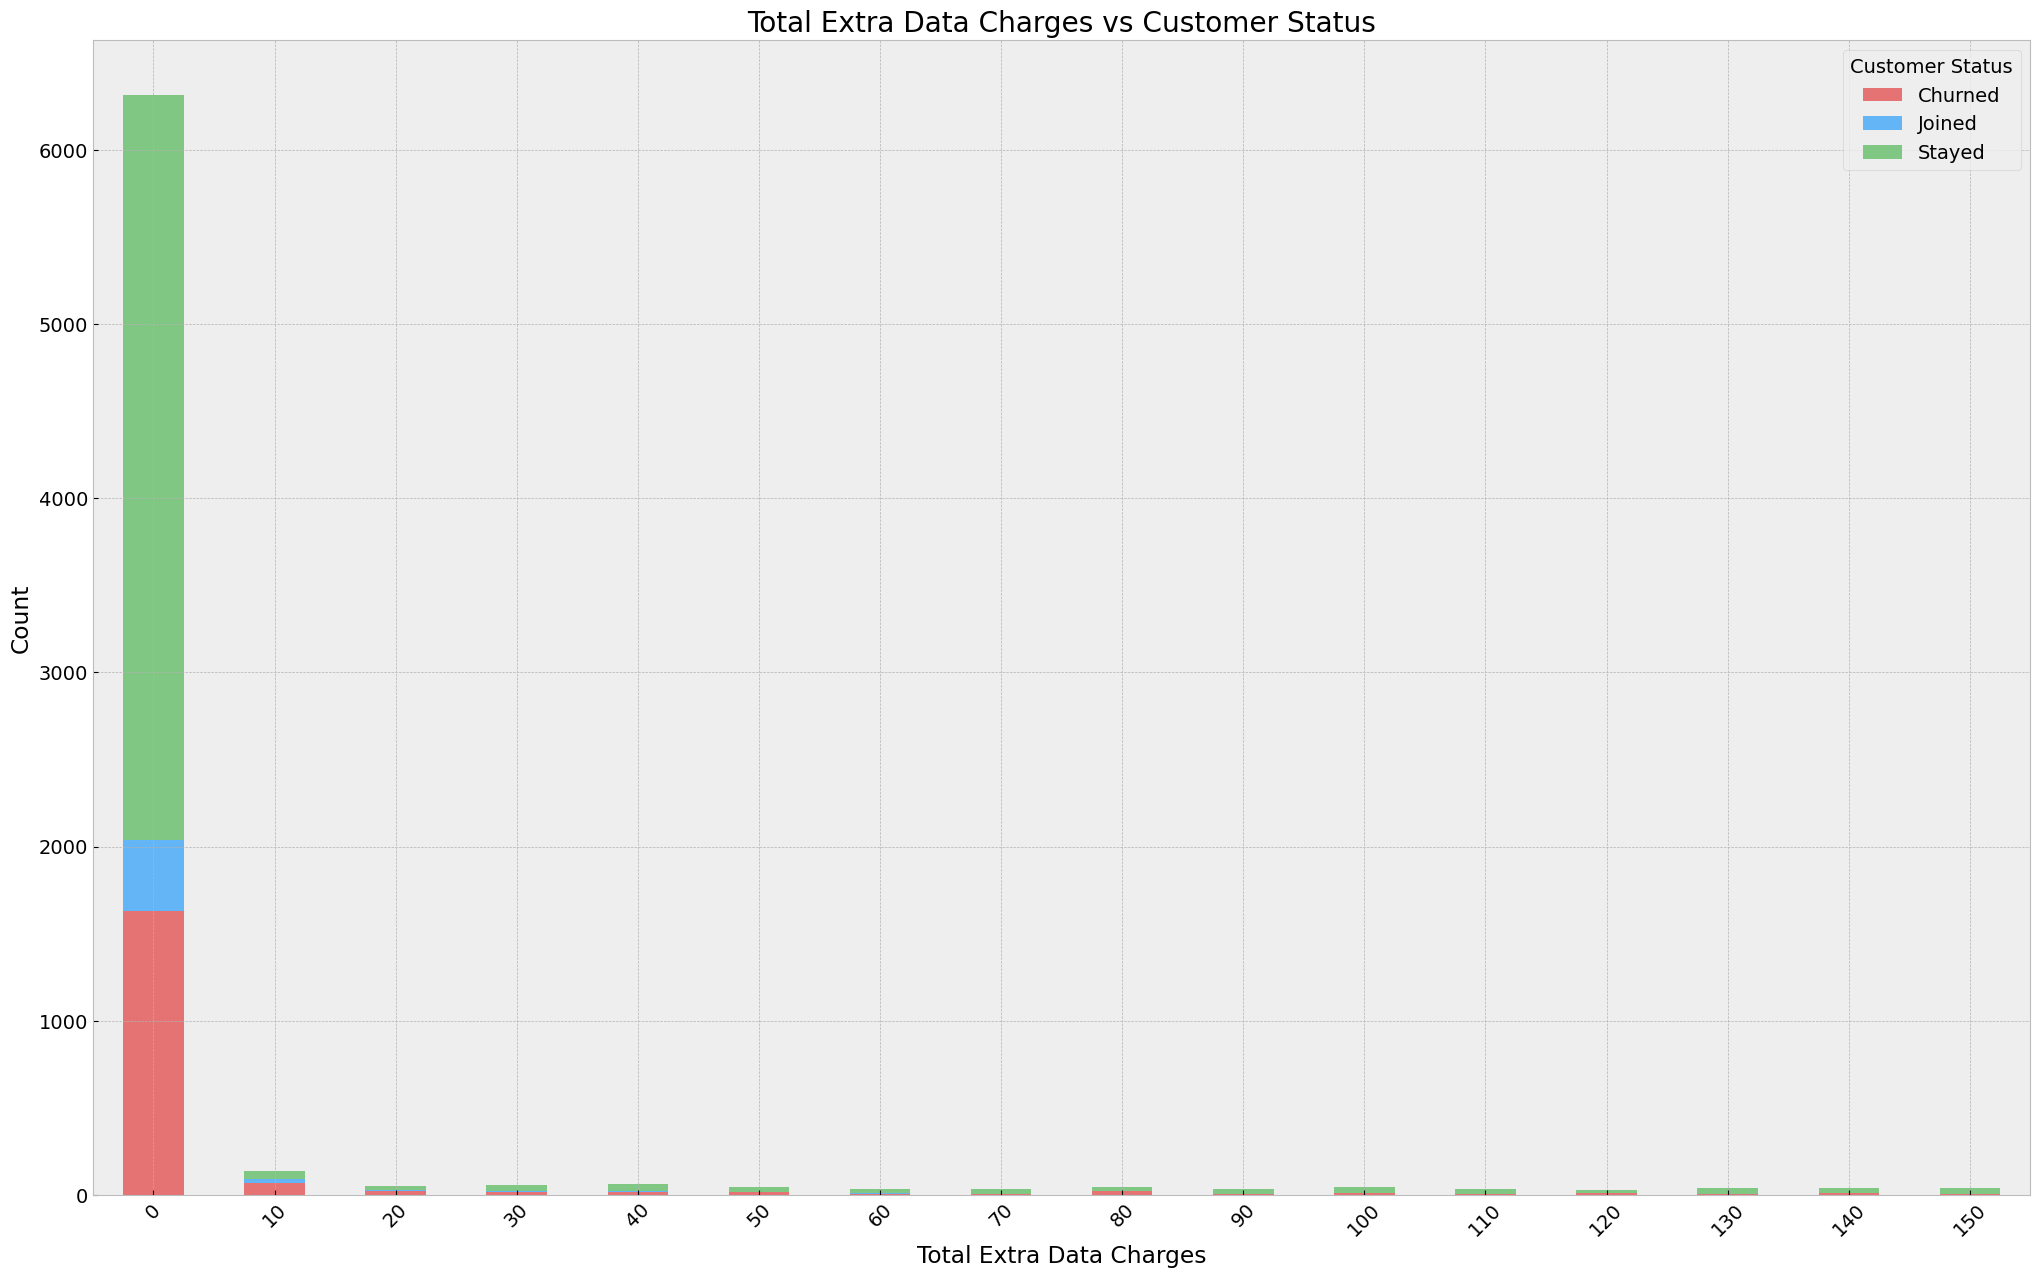

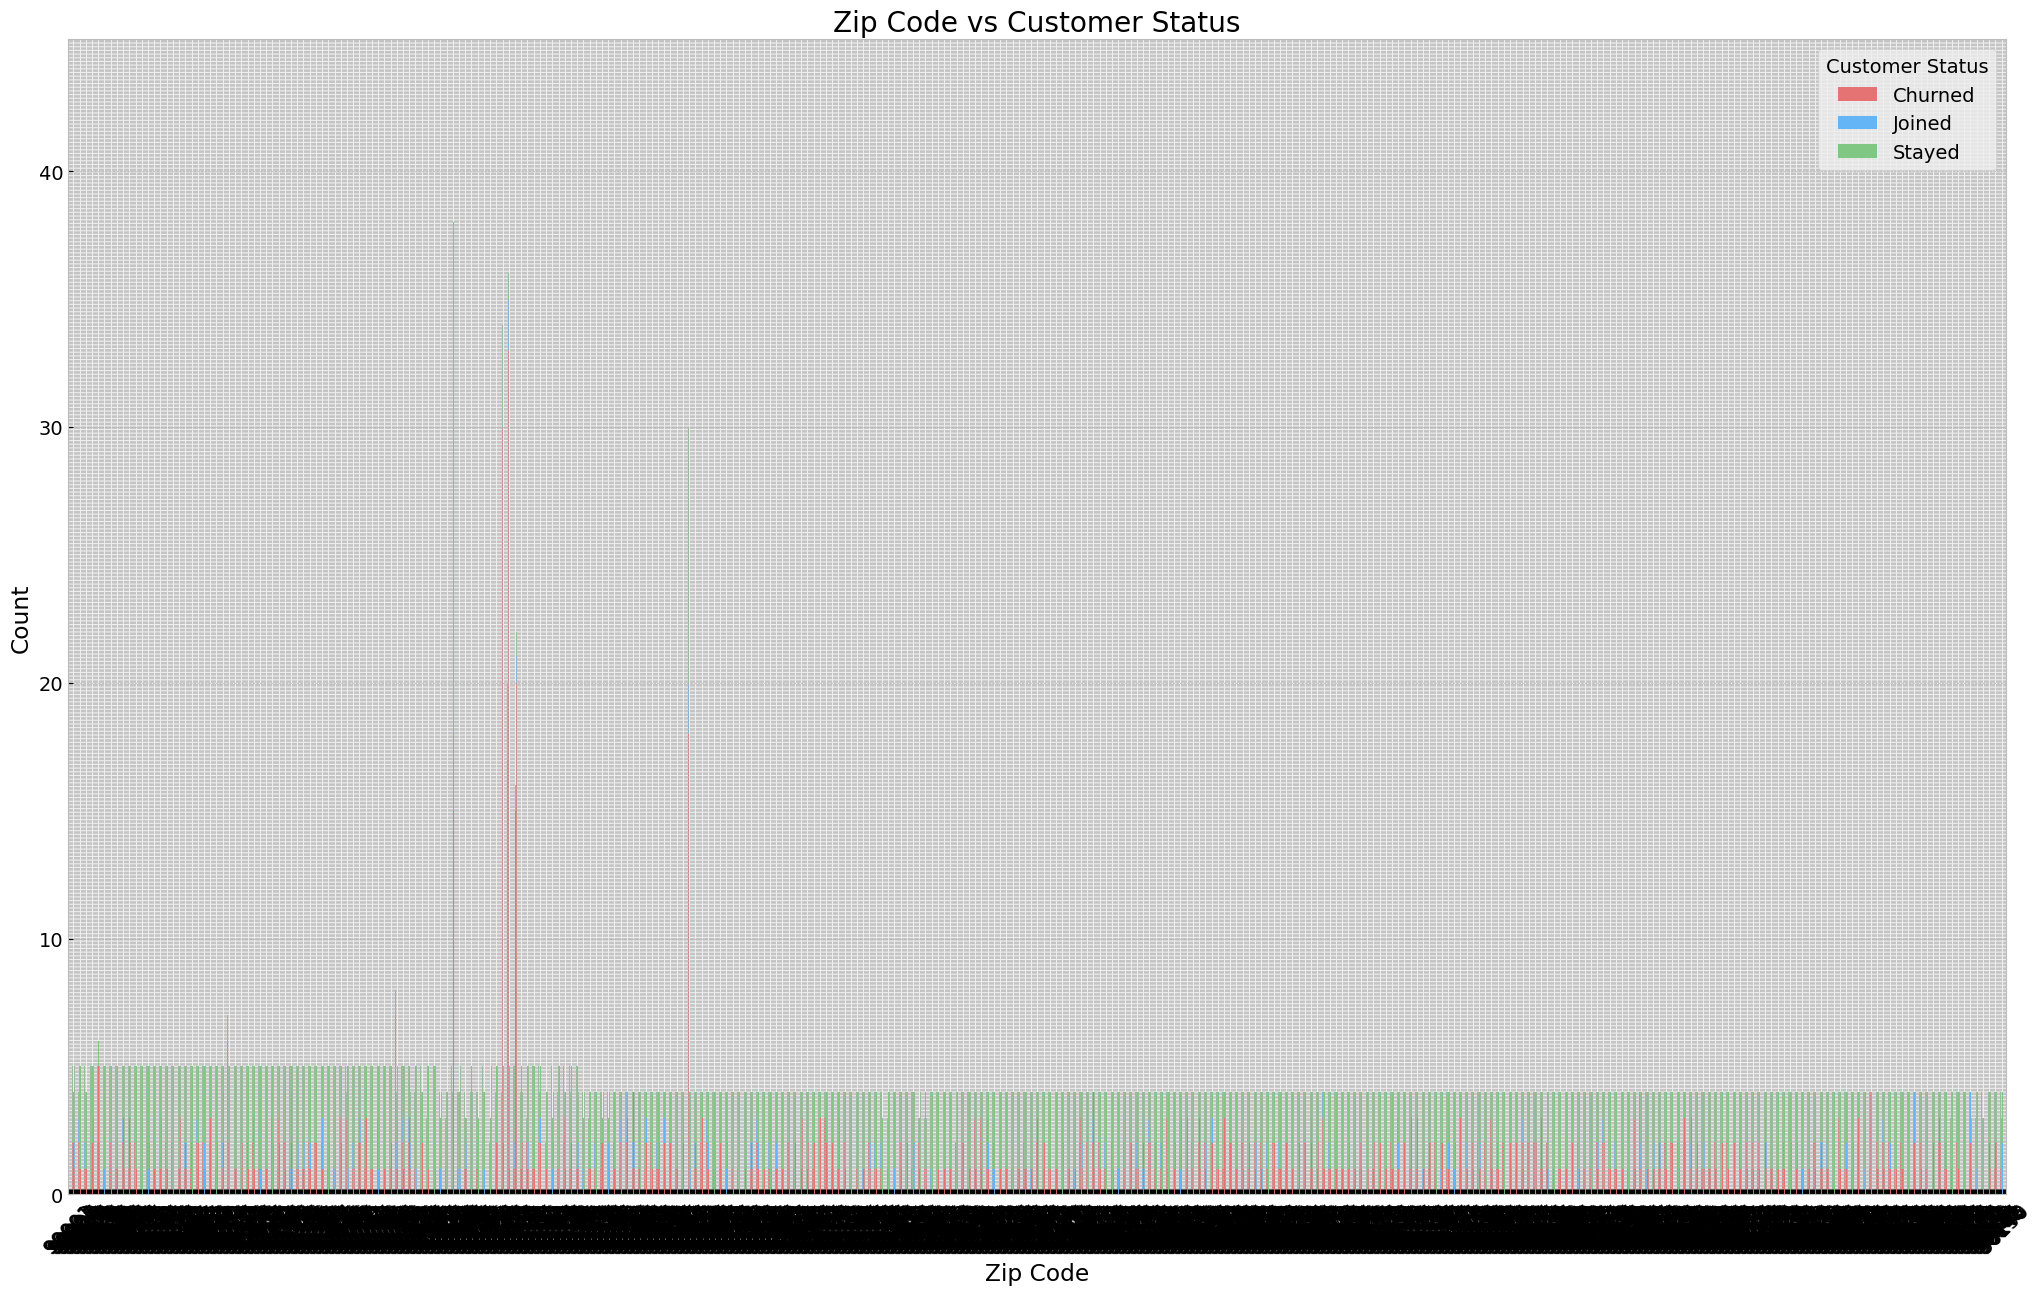

In [46]:
for f in eda_num_fs:
    status_distribution(df, f)


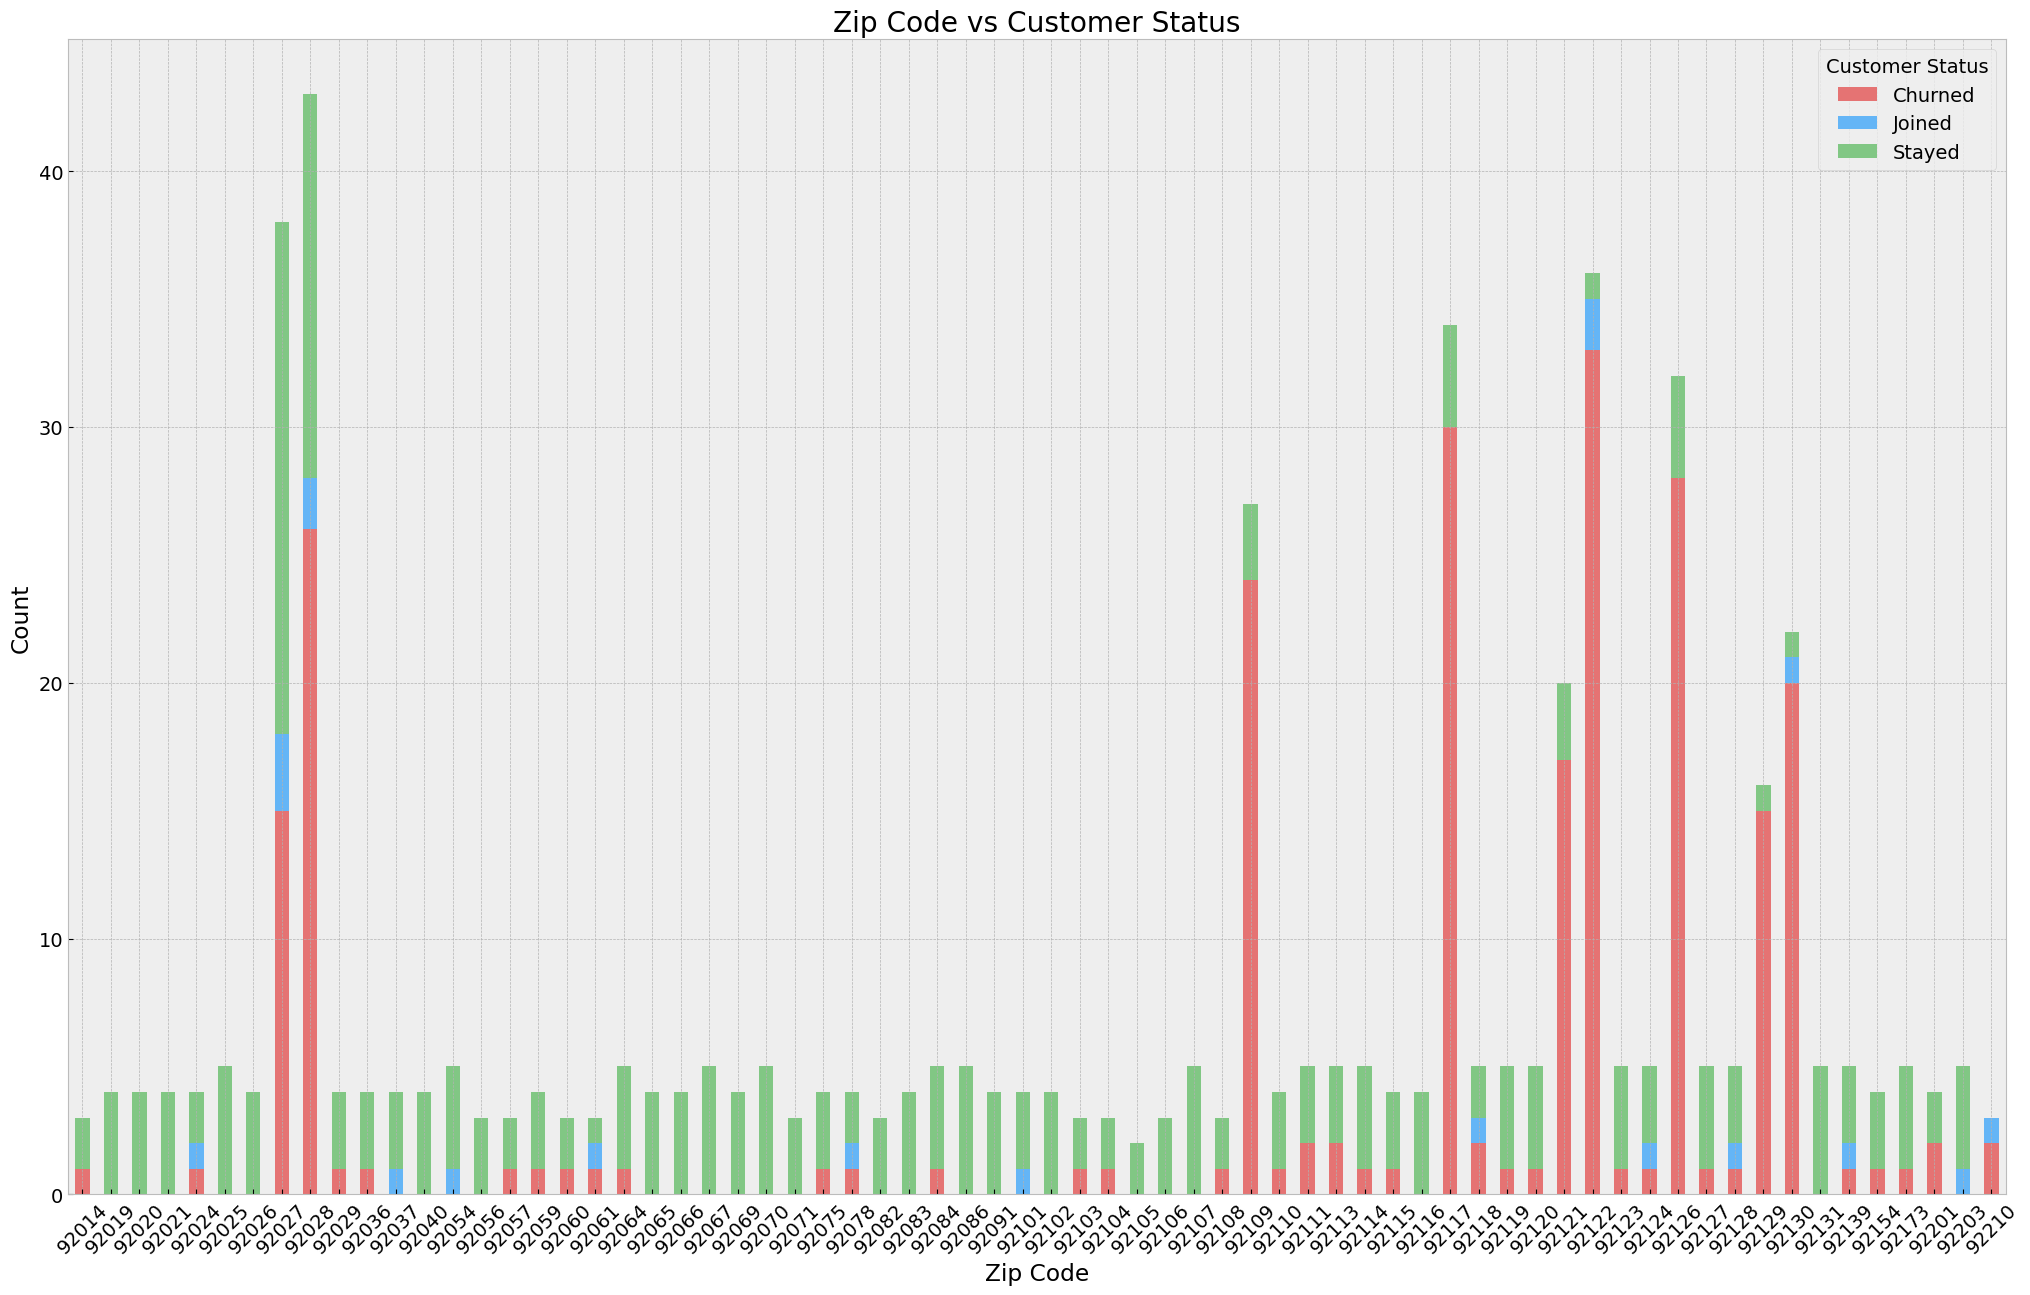

In [47]:
filtered_df = df[(df[f] >= 92010) & (df[f] <= 92210)]
status_distribution(filtered_df, 'Zip Code')

In [48]:
df[df['Avg Monthly GB Download'] == 39.0].head()

Gender  Age Married  Number of Dependents  Zip Code  \
4969  Female   26      No                     0     94596   

      Number of Referrals  Tenure in Months    Offer Phone Service  \
4969                    0                 2  Missing           Yes   

      Avg Monthly Long Distance Charges  ... Paperless Billing  \
4969                              30.73  ...                No   

       Payment Method Monthly Charge  Total Charges Total Refunds  \
4969  Bank Withdrawal          68.95         119.75           0.0   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
4969                        0                       61.46        181.21   

     Customer Status Churn Category  
4969         Churned     Competitor  

[1 rows x 33 columns]

#### churn proportion

In [49]:
def churn_proportion(df, f):
    status_dis = df.groupby([f, 'Customer Status'])['Customer Status'].count().unstack()
    churn_pro = (status_dis['Churned'] / status_dis.sum(axis=1)) * 100
    colors = list(color_set.values())
    plt.figure(figsize=(25, 15))
    churn_pro.plot(kind='bar', color=colors)
    plt.title(f'{f} vs Churn Proportion')
    plt.xlabel(f)
    plt.ylabel('Churn Proportion (%)')
    plt.tick_params(axis='x', labelrotation=45)
    plt.show()

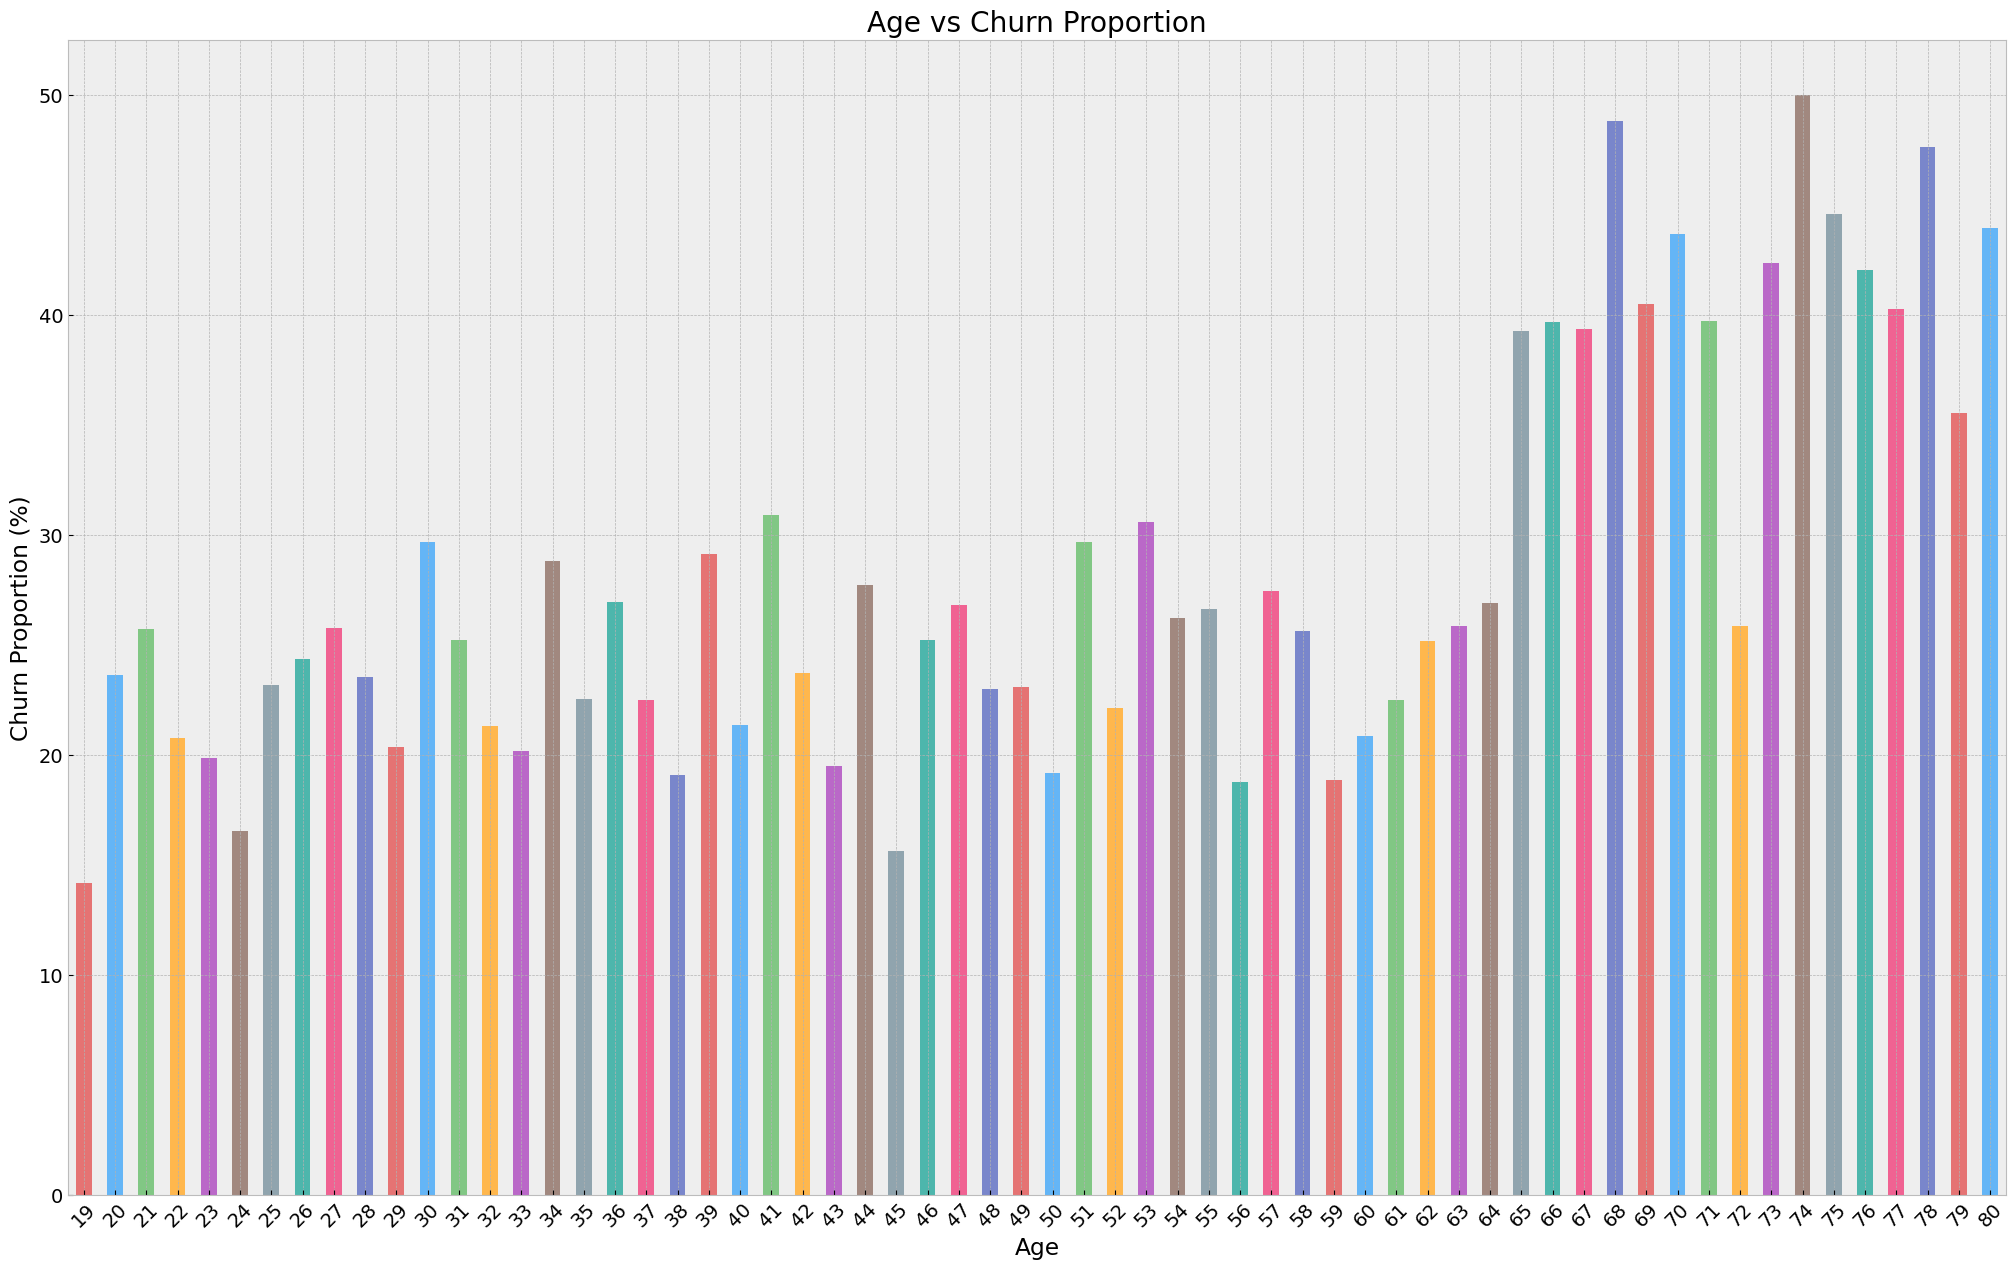

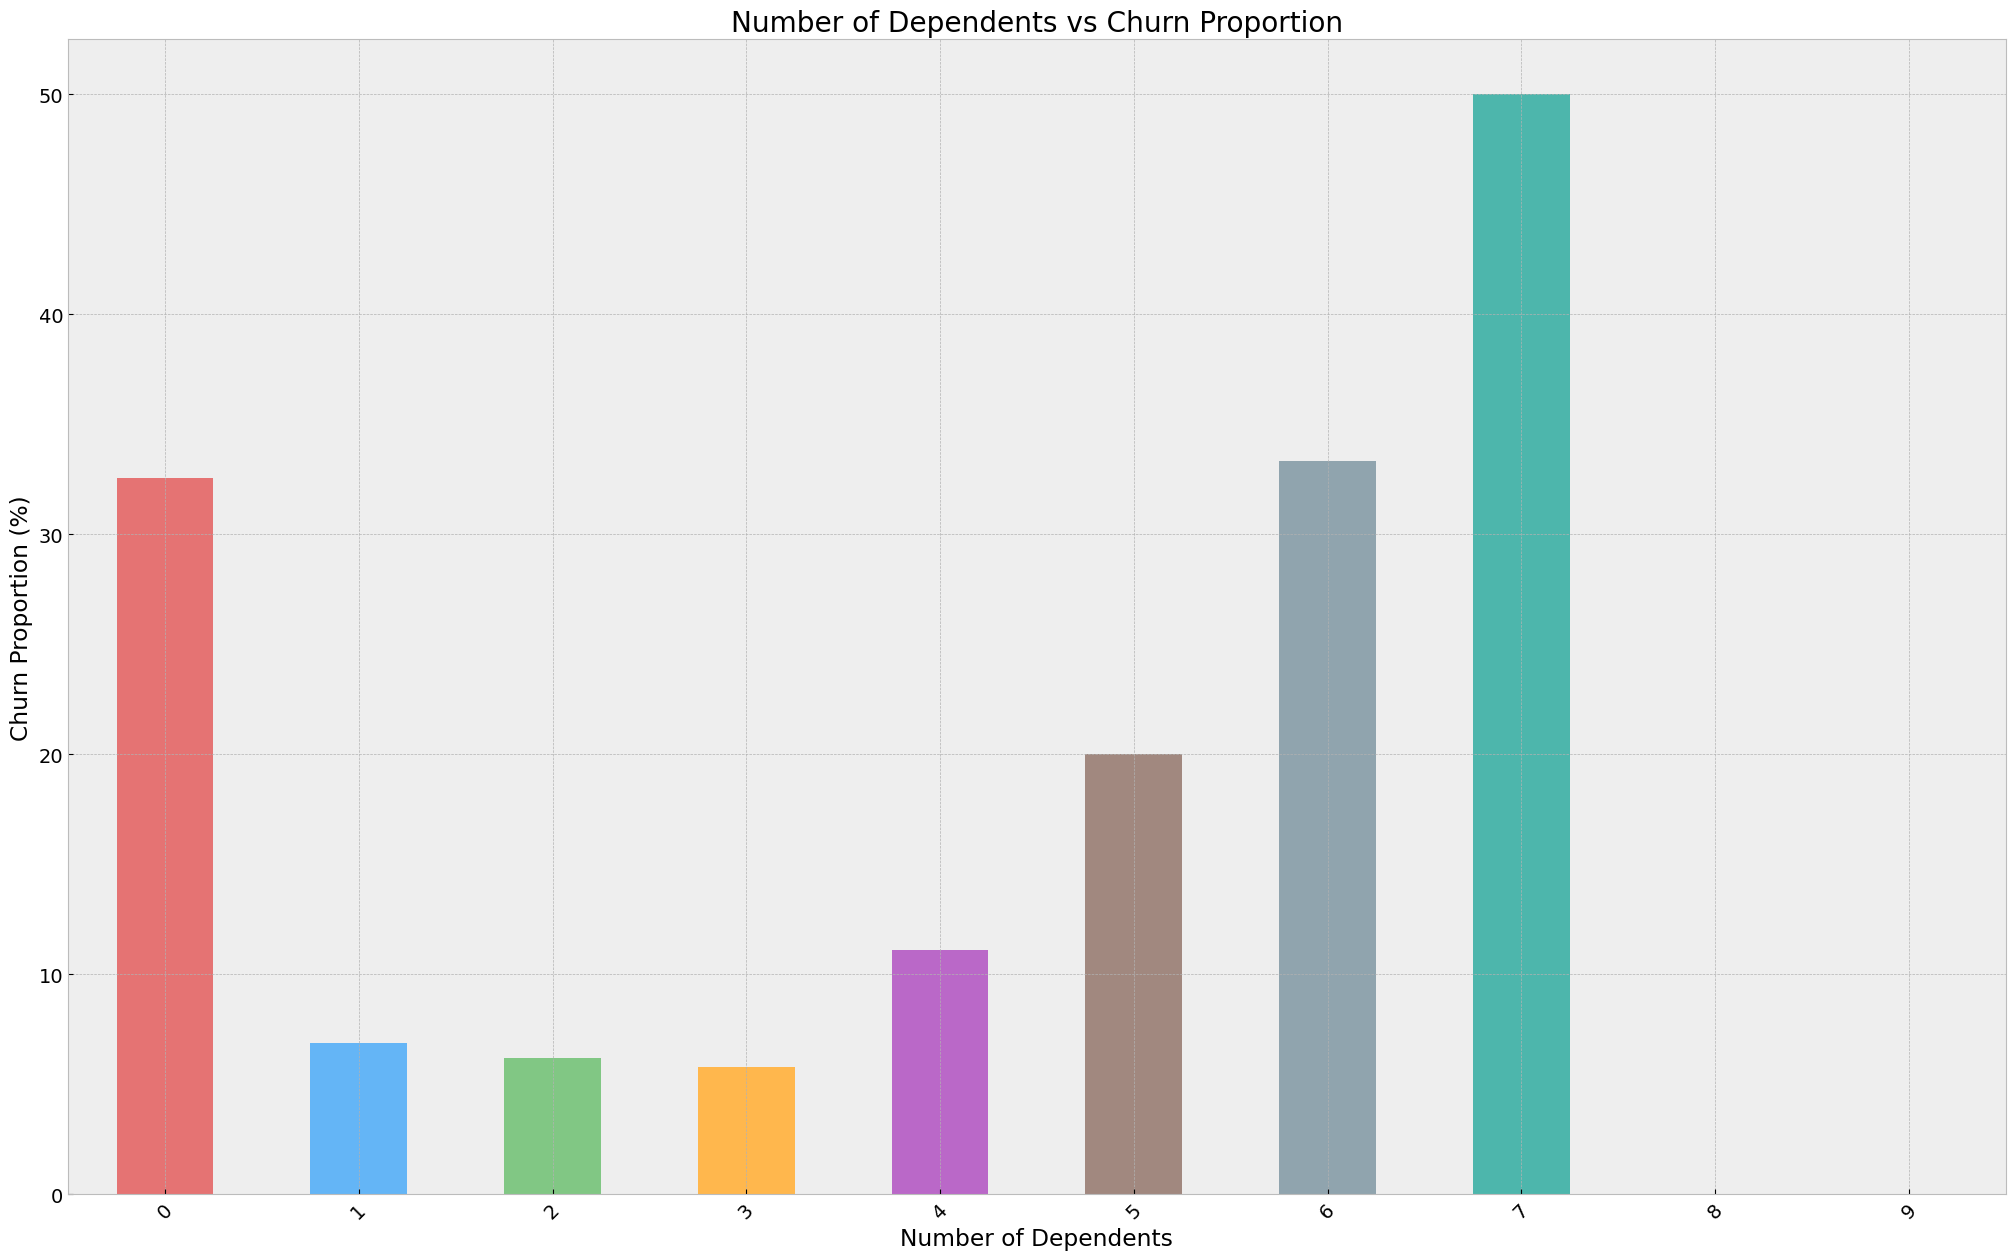

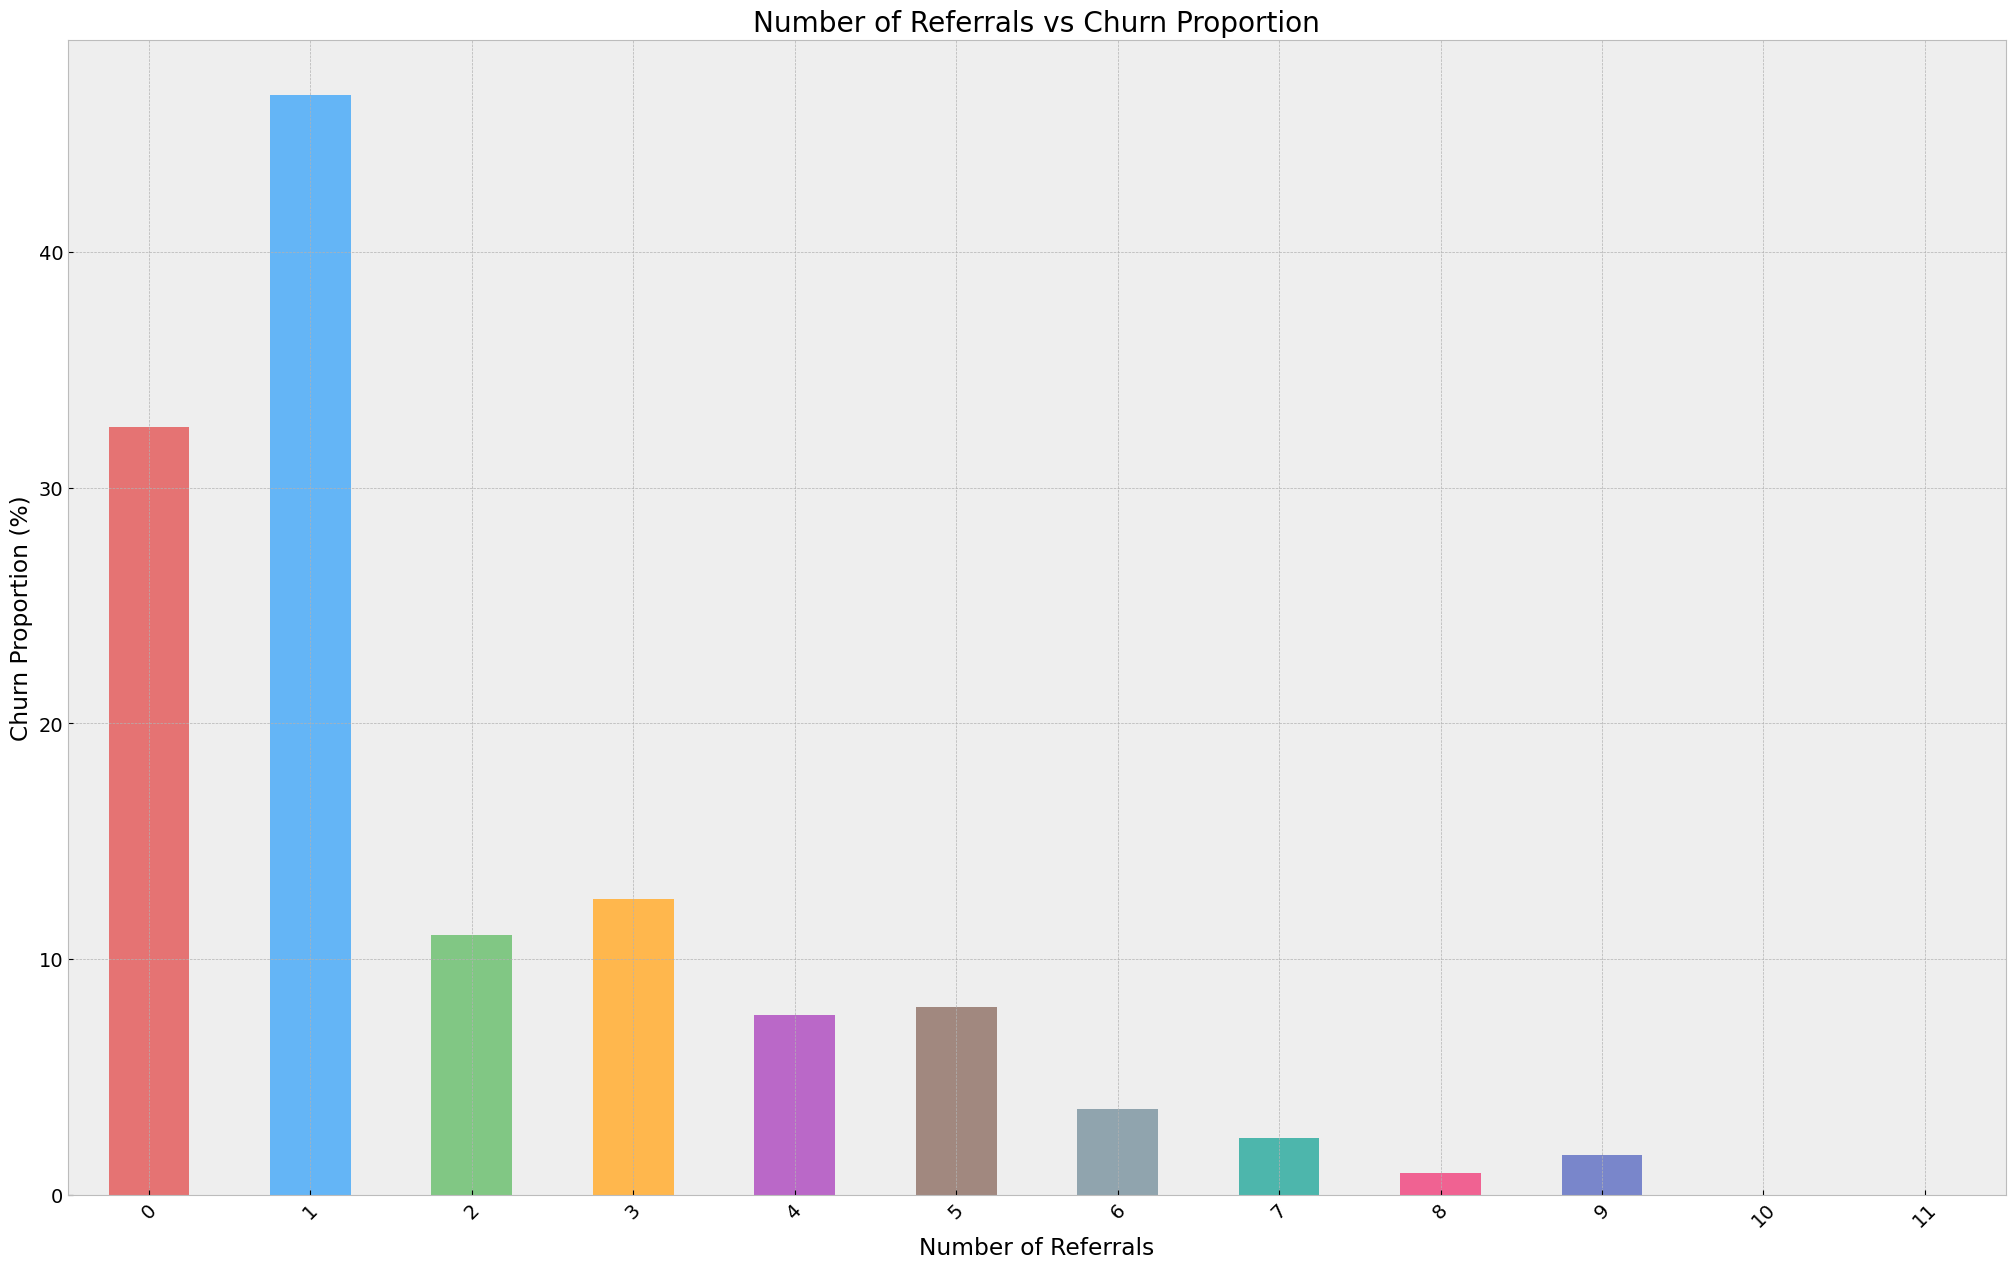

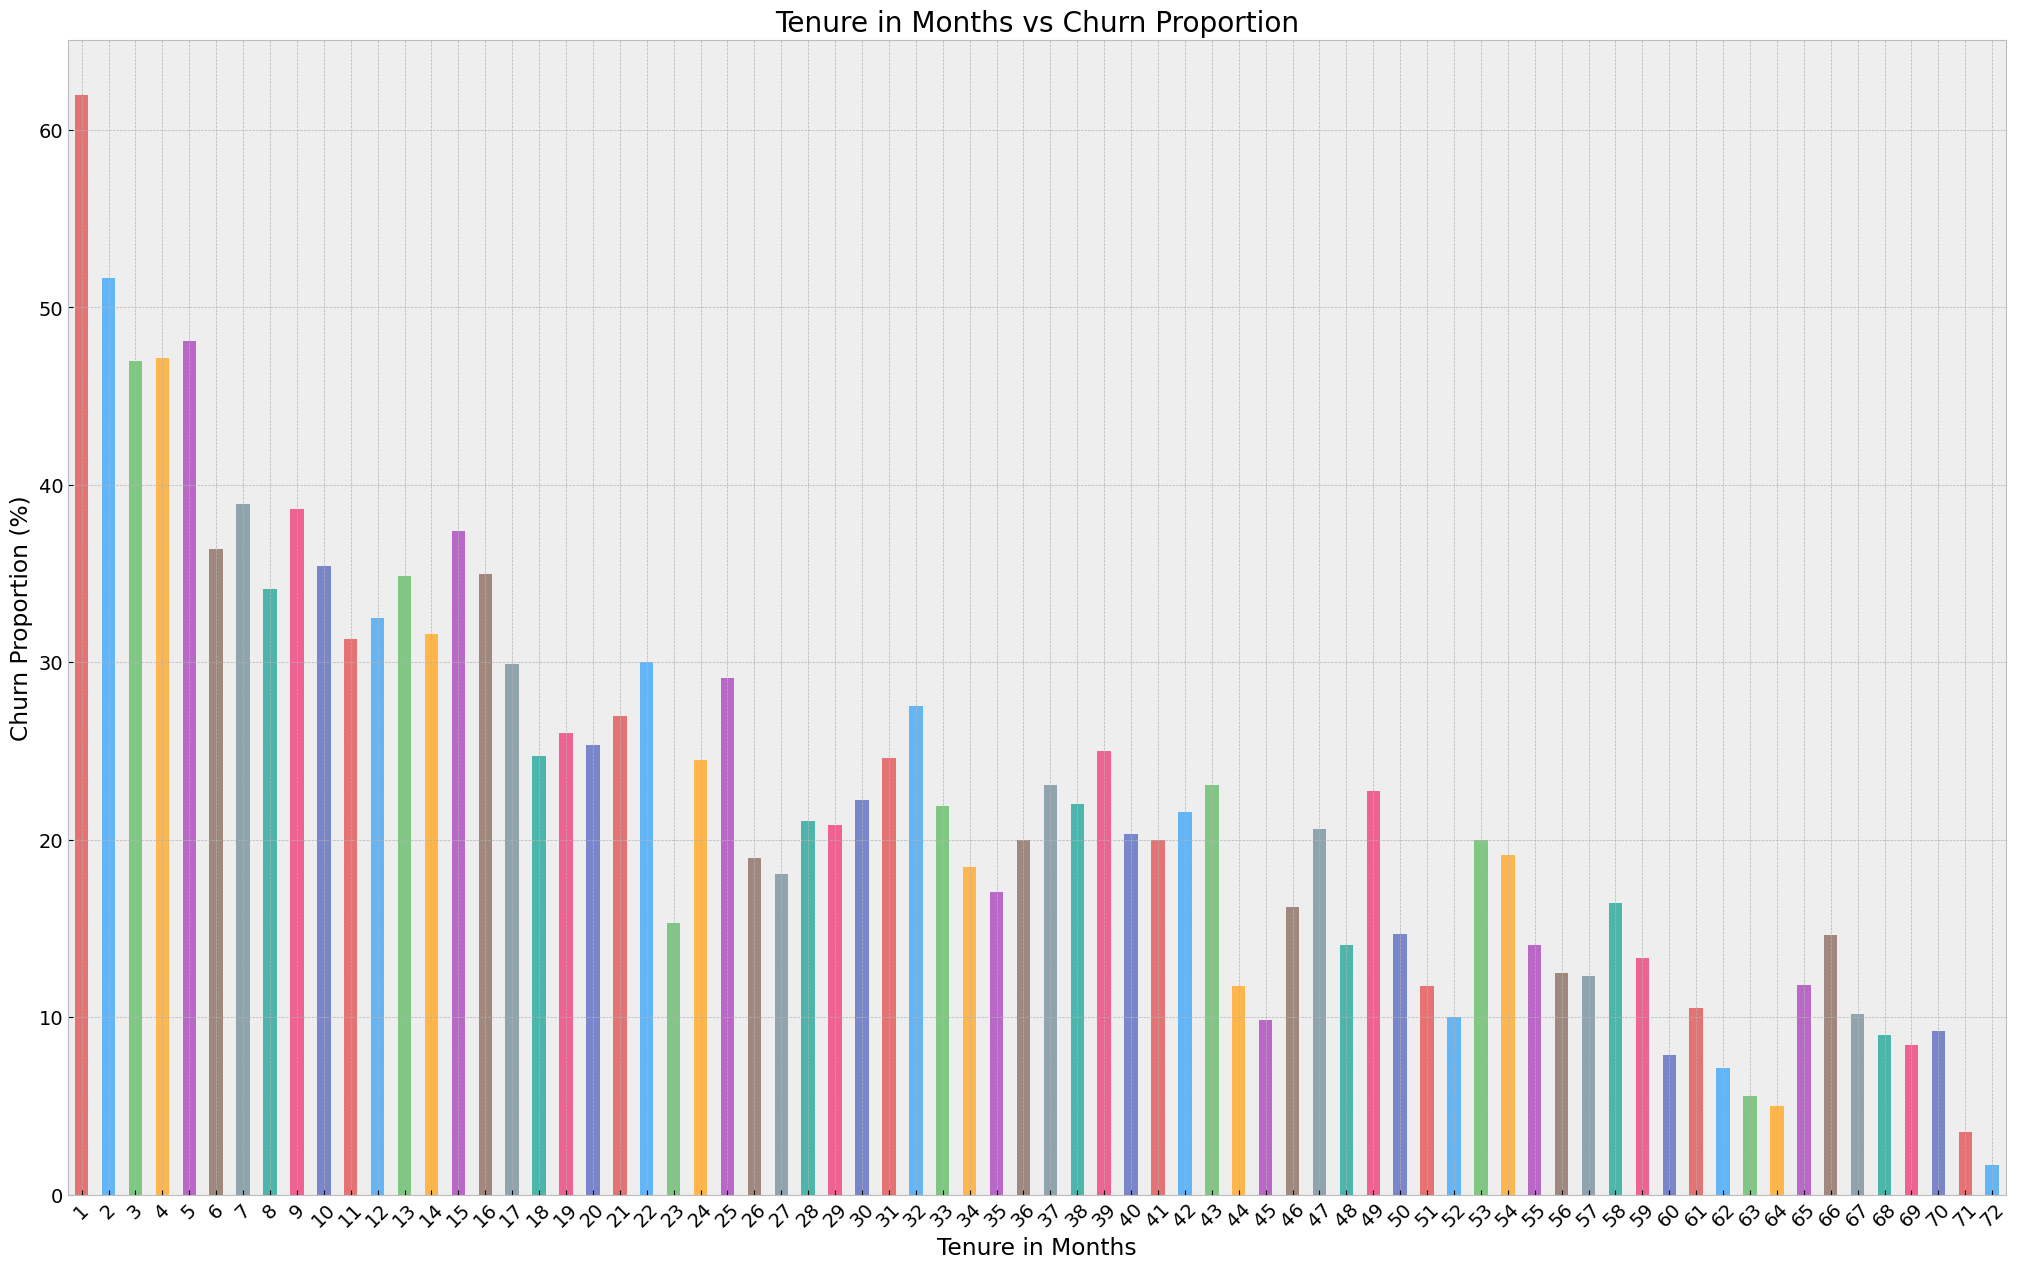

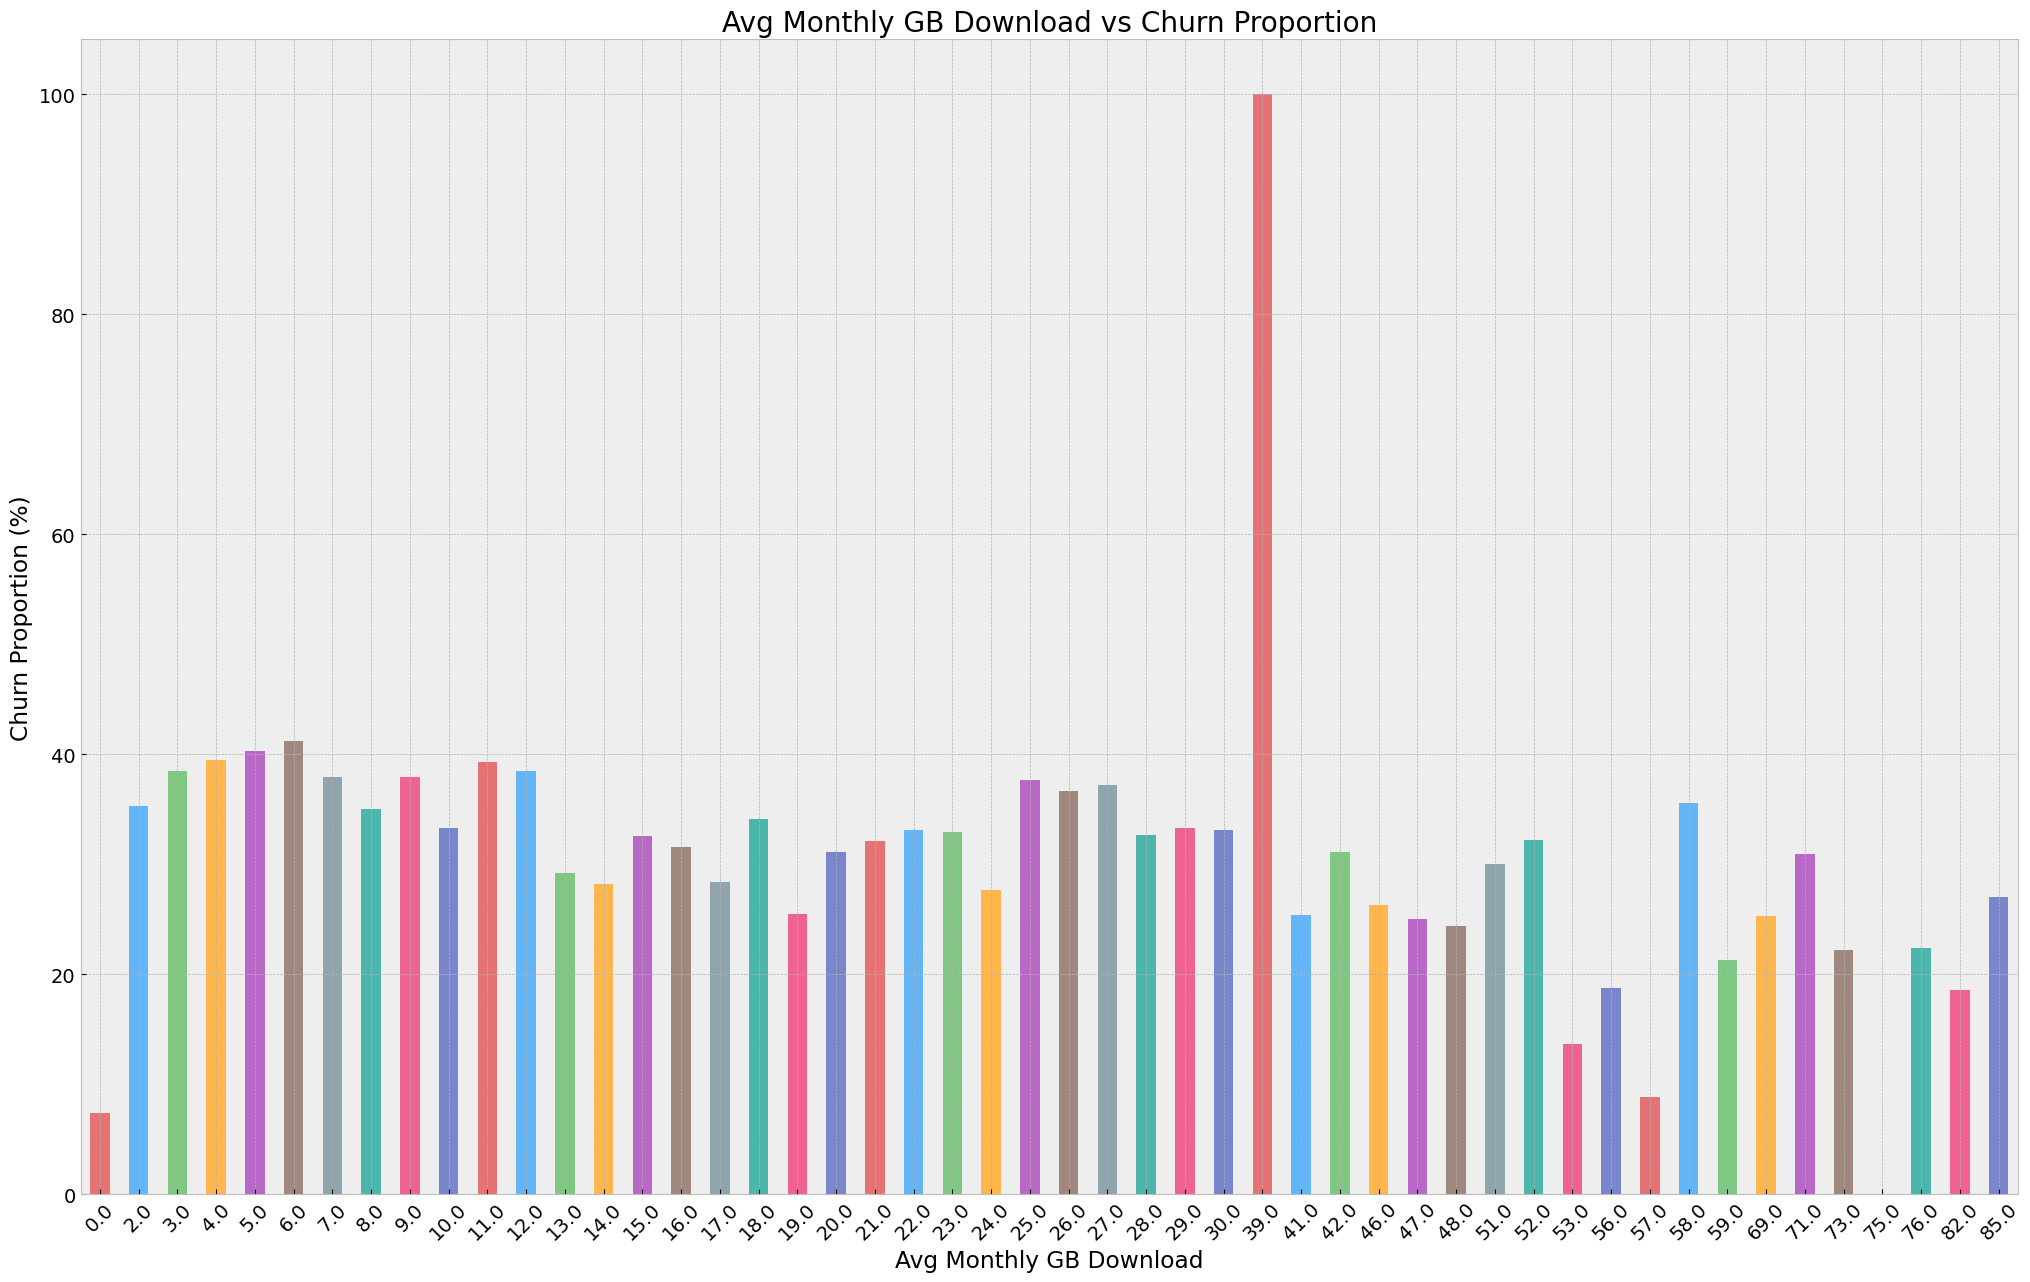

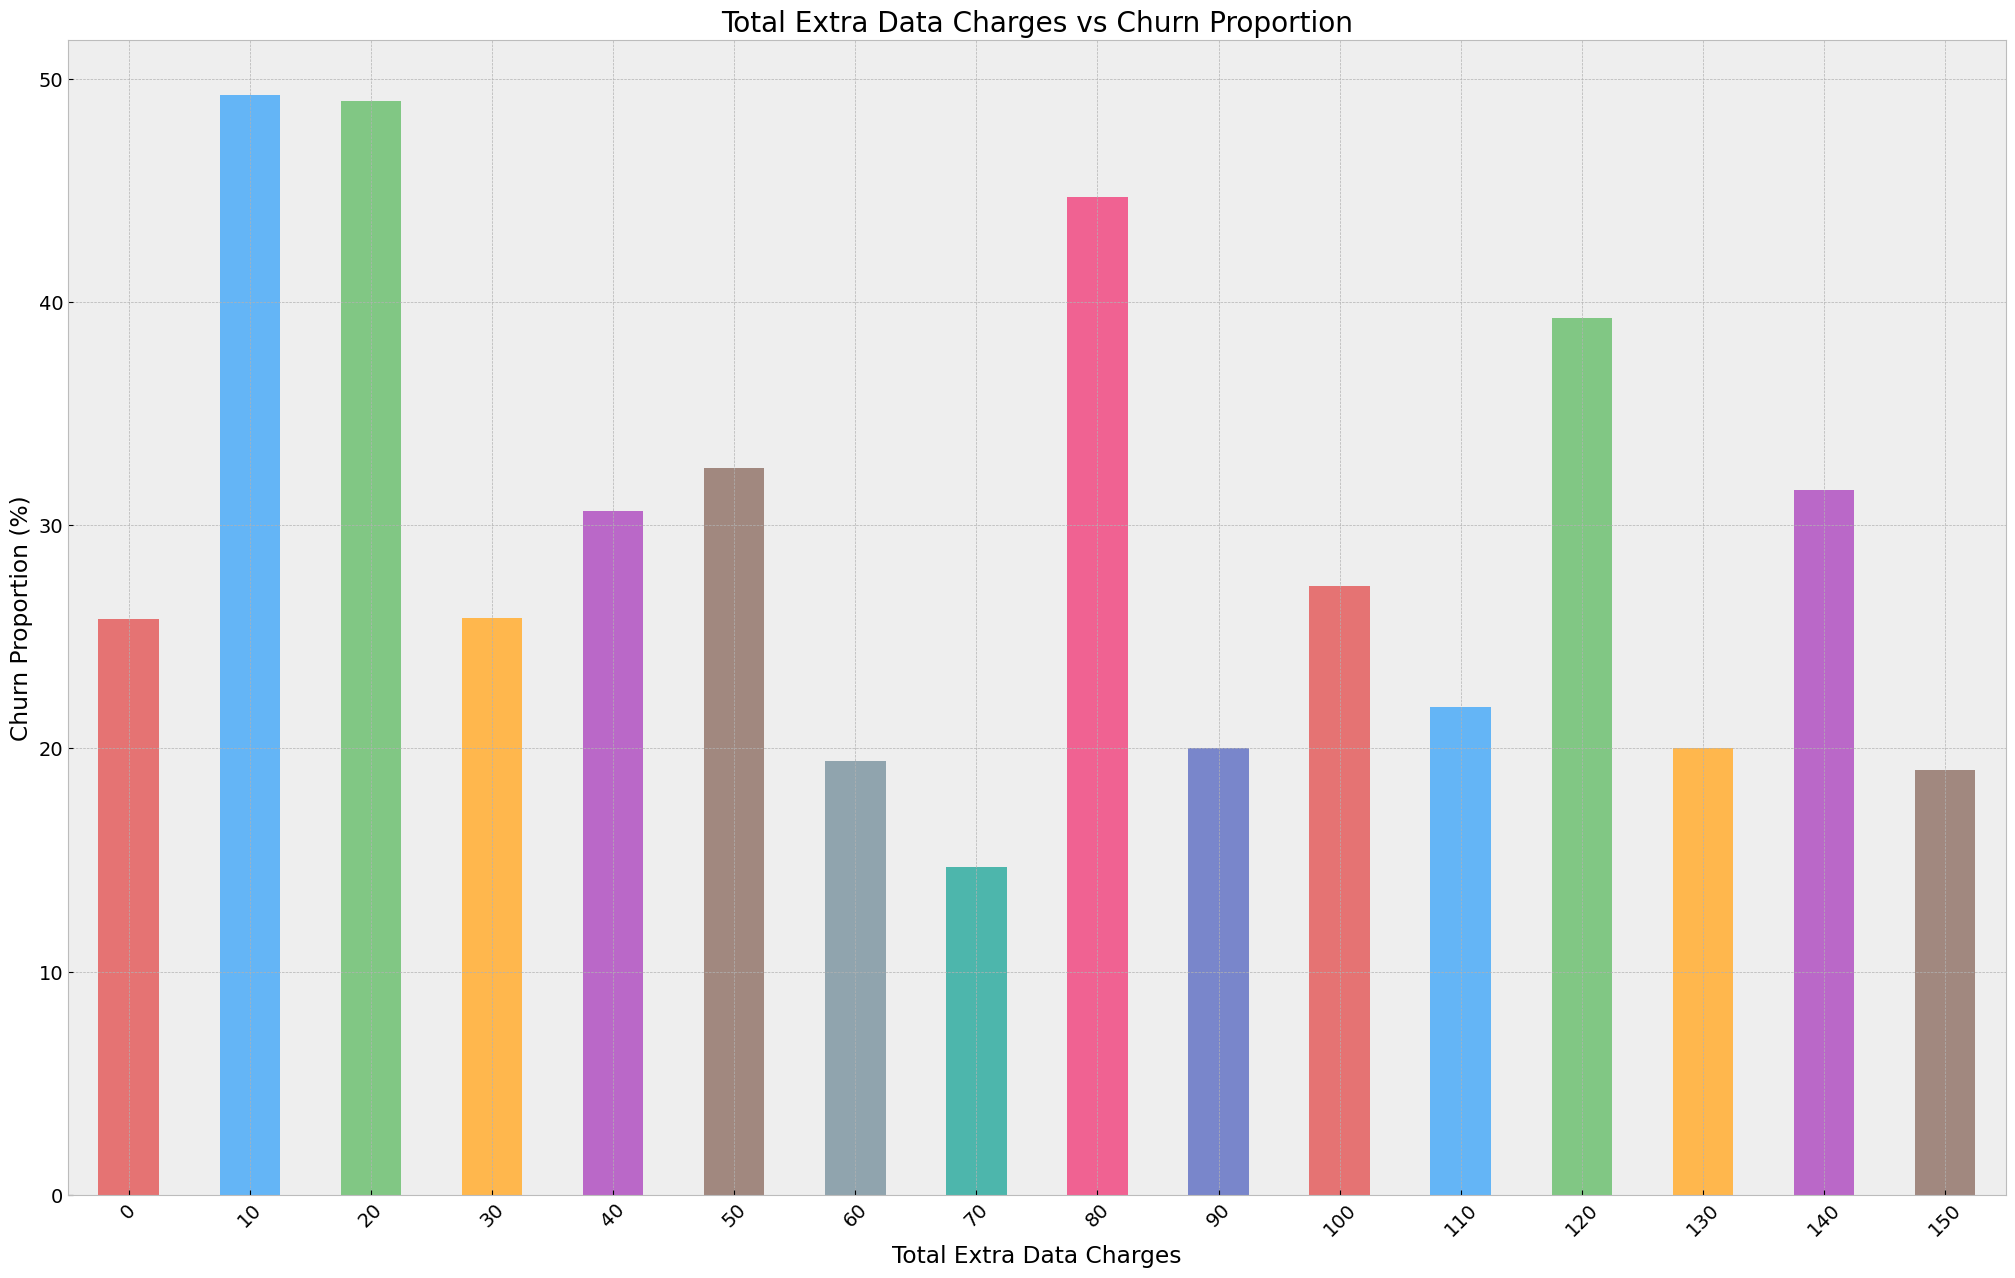

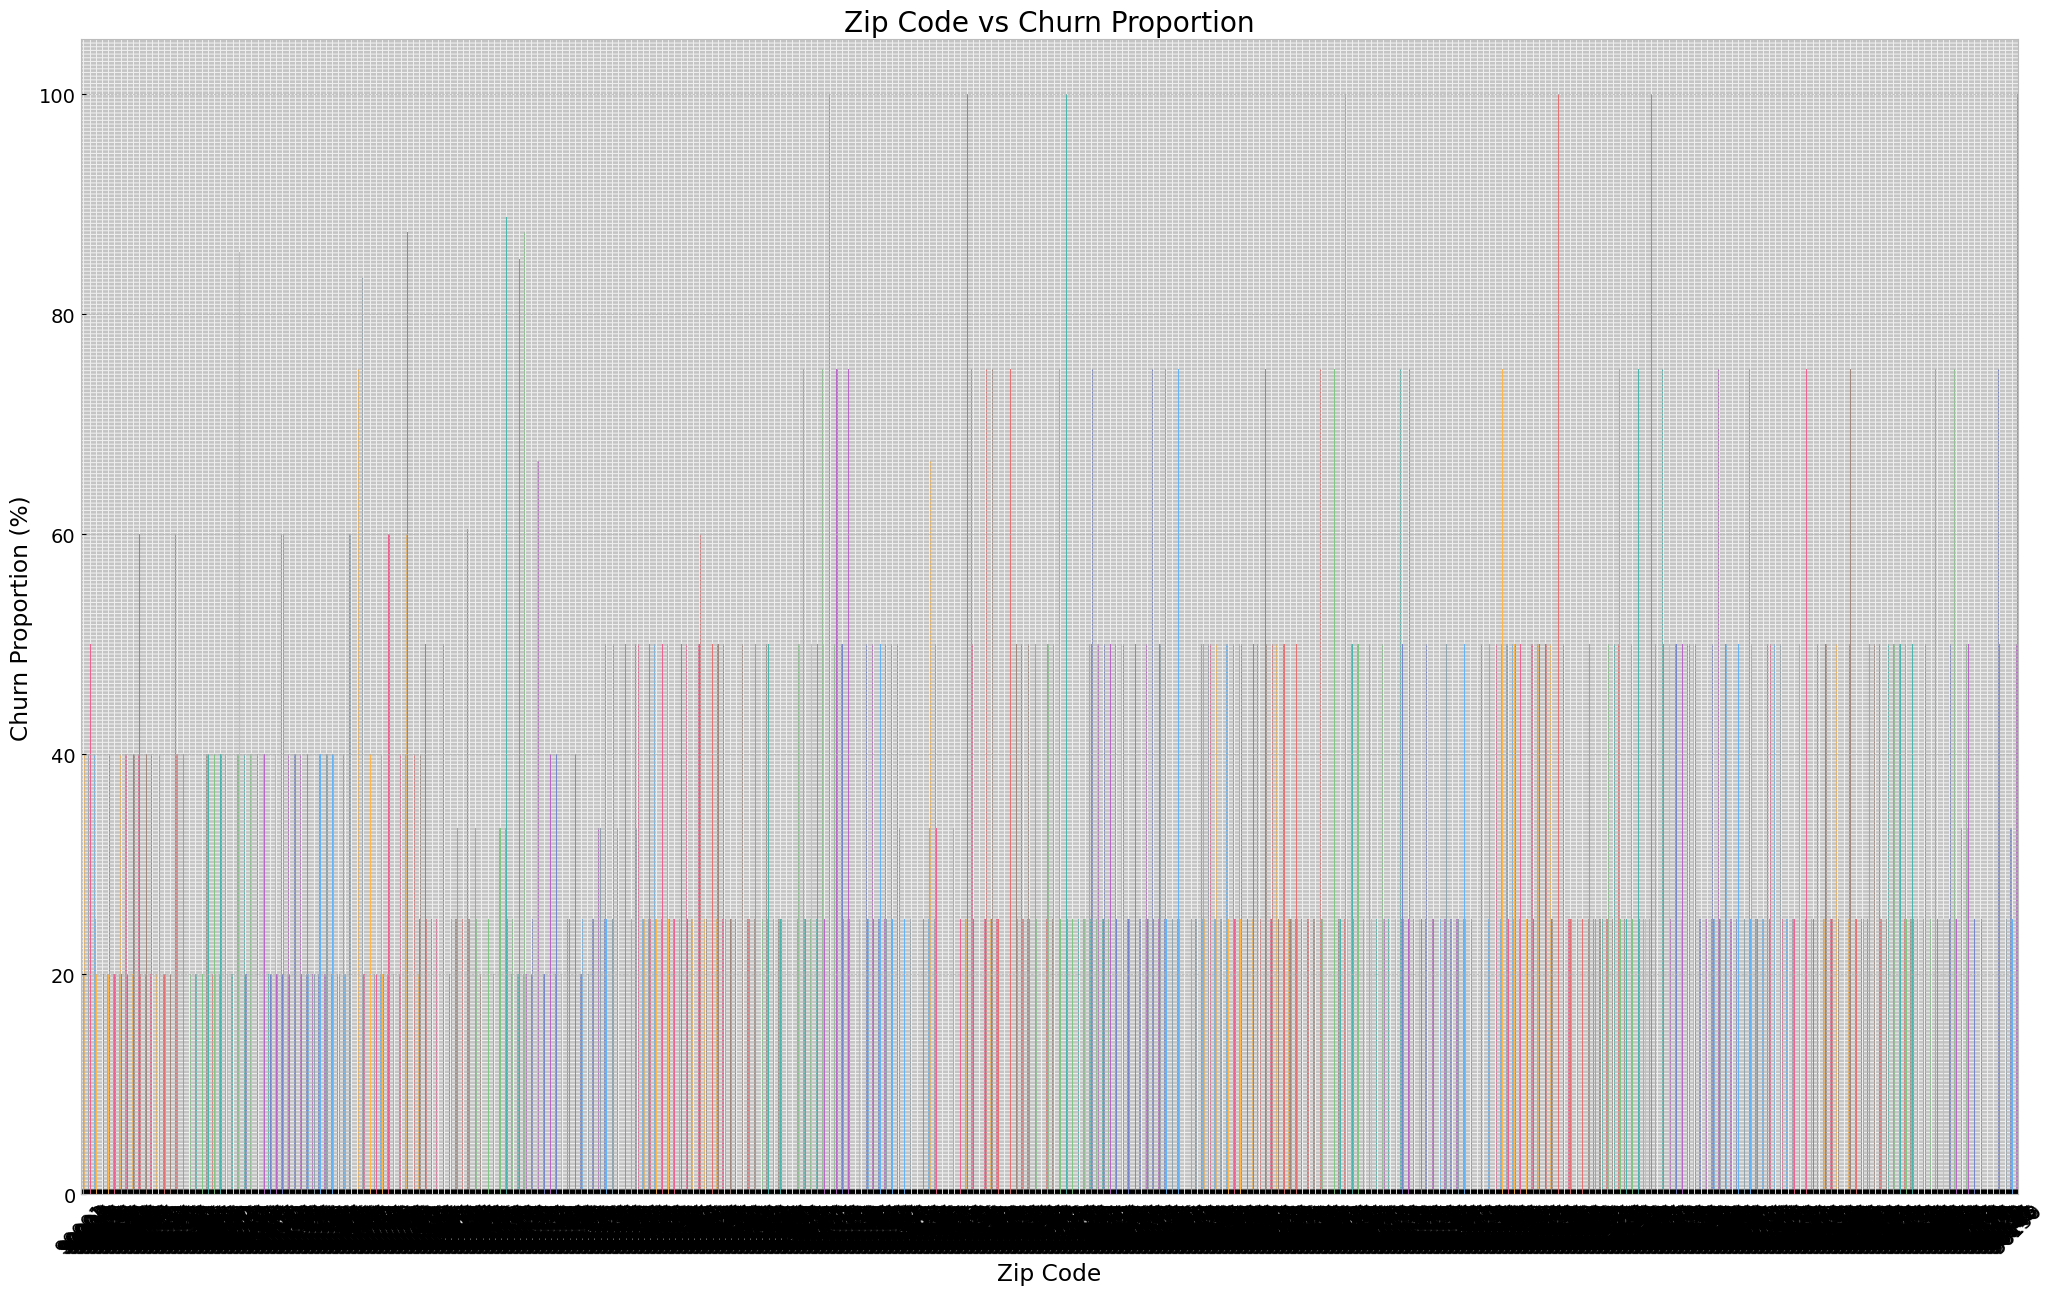

In [50]:
for f in eda_num_fs:
    churn_proportion(df, f)

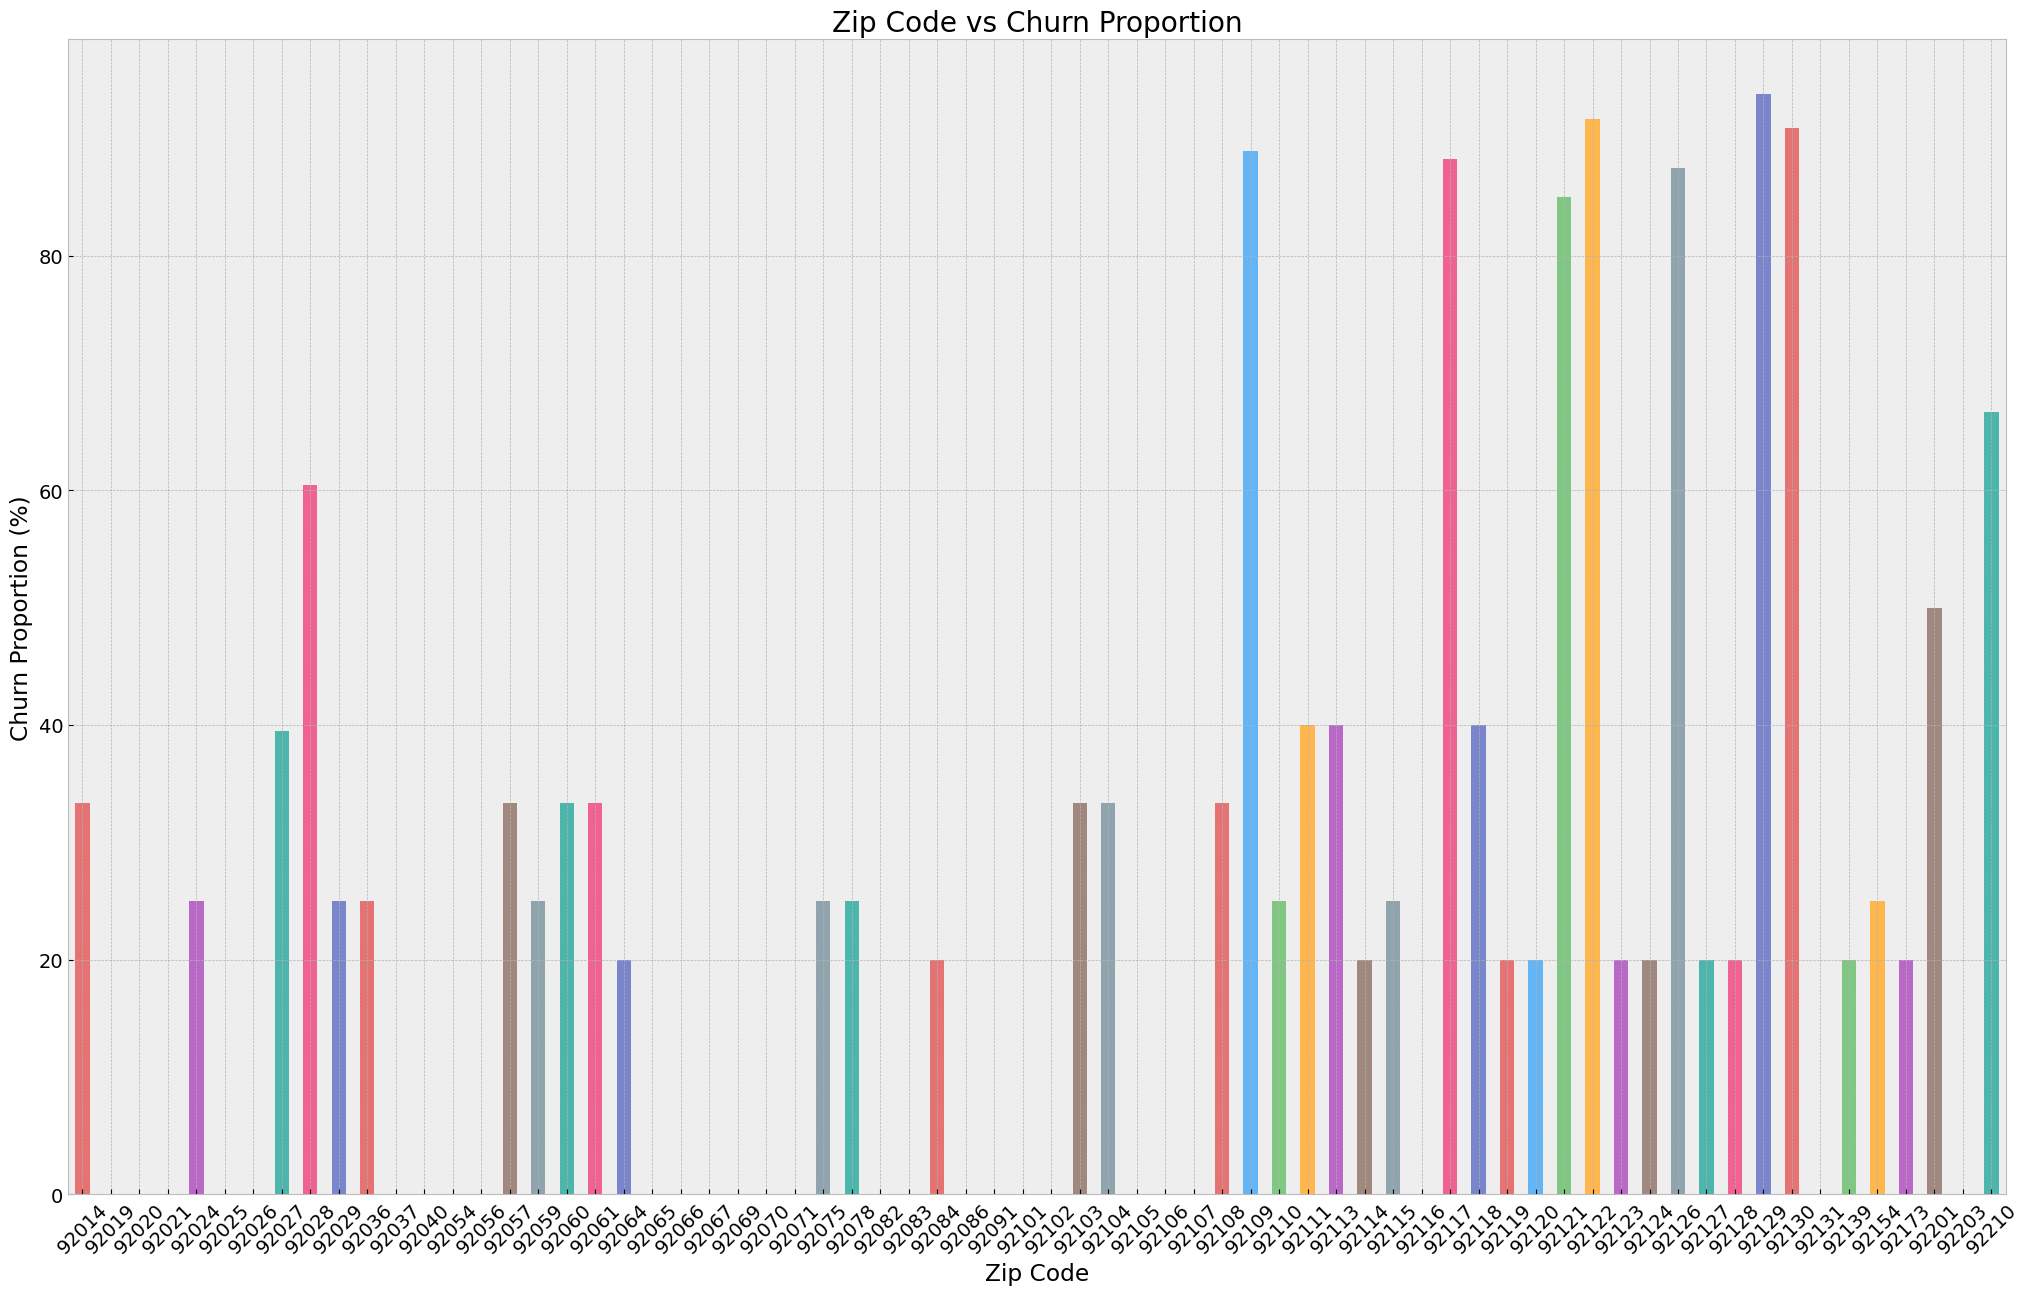

In [51]:
churn_proportion(filtered_df, 'Zip Code')